## Preamble



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from getdist import plots, MCSamples
from IPython.display import HTML, display
# import tabulate

## MCMC chains



In [1]:
import glob
import pandas as pd
def get_chains(path, drop=["As"]):
    all_files = glob.glob(path)
    # Sort alphabetically
    all_files.sort()
    chains = {}
    for f in all_files:
        df = pd.read_csv(f, delim_whitespace=True)
        # Compute delta chi2
        delta_chi2 = df.chi2-np.min(df.chi2)

        # Remove useless columns
        df.drop(columns=["#weight", "minuslogpost", "minuslogprior", "minuslogprior__0", "chi2", "chi2__chi2"] + drop, inplace=True)
        # or use df.filter(["H0",...]) to keep only relevant columns
        # Insert Delta chi2 before As (which is derived and never plot)
        df.insert(value=delta_chi2, column="delta_chi2", loc=len(df.columns))
        key = f.split("/")[-2]
        chains[key] = df
    return chains

def plot_chains(path, burnin=0, labels=[], nrow=2, ncol=4, drop=["As"]):
    chains = get_chains(path=path, drop=drop)
    plt.figure(figsize=(18, 10))
    for i in range(0, len(labels)):
        plt.subplot(nrow, ncol, i+1)
        plt.ylabel(labels[i])
        for k, v in chains.items():
            j = k.split("_")[-1]
            n = np.arange(len(v))
            ist = 0
            if 0 < burnin < 1:
                ist = int((1.-burnin)*len(v))
            else:
                ist = int(burnin)
            plt.plot(n[ist:], v.iloc[:,i][ist:], alpha=0.75, color="C{}".format(j))
        if i == len(labels)-1:
            plt.legend(list(chains.keys()), loc="upper left", bbox_to_anchor=(1,1))
    plt.subplots_adjust(hspace=0.25, wspace=0.3)

### MCMC without \tau prior



In [1]:
labels = [
  r"$\theta_\mathrm{MC}$",
  r"$\log(10^{10}A_\mathrm{s})$",
  r"$n_\mathrm{s}$",
  r"$\Omega_\mathrm{b}h^2$",
  r"$\Omega_\mathrm{c}h^2$",
  r"$A_S$",
  r"$H_0$",
  r"$\chi^2-\chi^2_\mathrm{min}$"]

result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff"

#### R(TE)



# Out[112]:

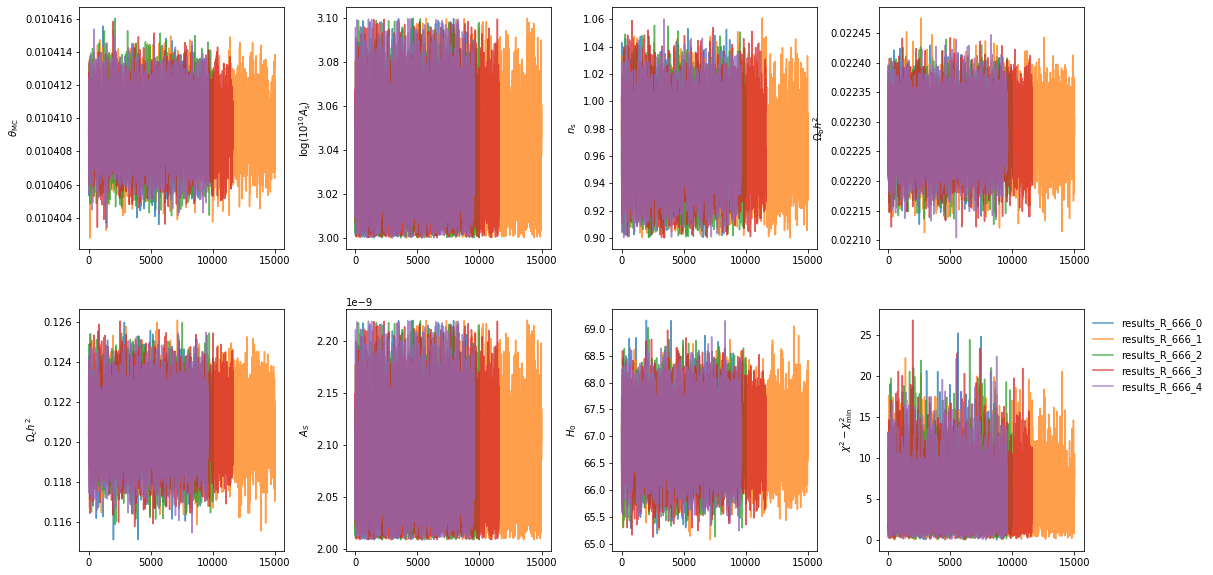

In [1]:
plot_chains(result_path + "/*_R_*/mcmc*.txt", burnin=0, labels=labels)

#### TE



# Out[113]:

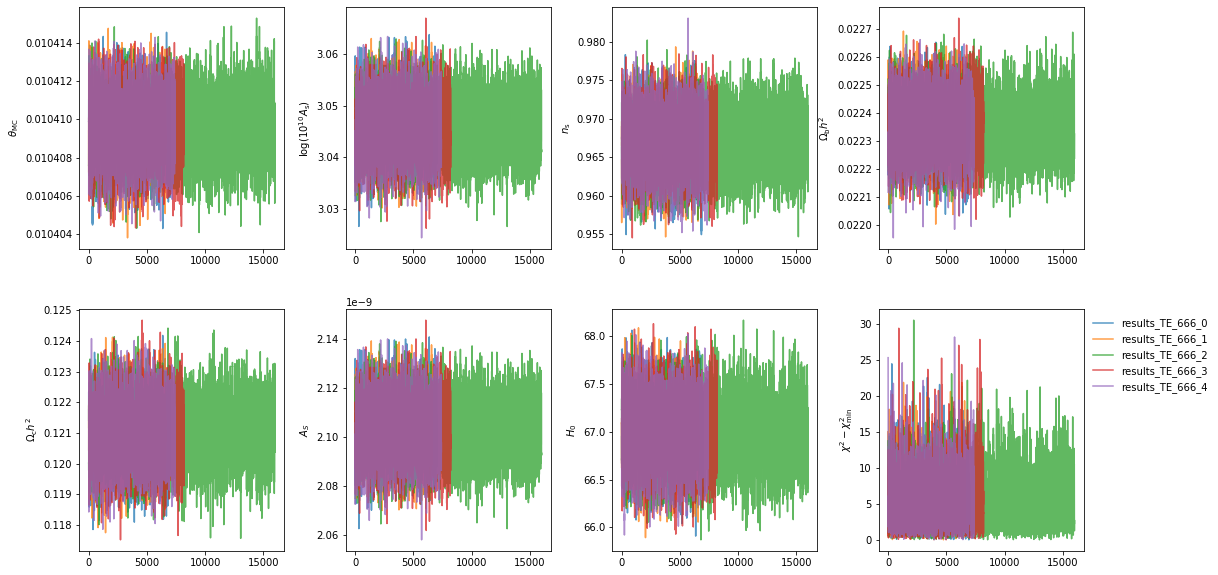

In [1]:
plot_chains(result_path + "/*_TE_*/mcmc*.txt", burnin=0, labels=labels)

### MCMC with \tau prior



In [1]:
labels = [
  r"$\theta_\mathrm{MC}$",
  r"$\log(10^{10}A_\mathrm{s})$",
  r"$n_\mathrm{s}$",
  r"$\Omega_\mathrm{b}h^2$",
  r"$\Omega_\mathrm{c}h^2$",
  r"$\tau$",
  # r"$A_S$",
  r"$H_0$",
  r"$\chi^2-\chi^2_\mathrm{min}$"]

#### R(TE)



# Out[64]:

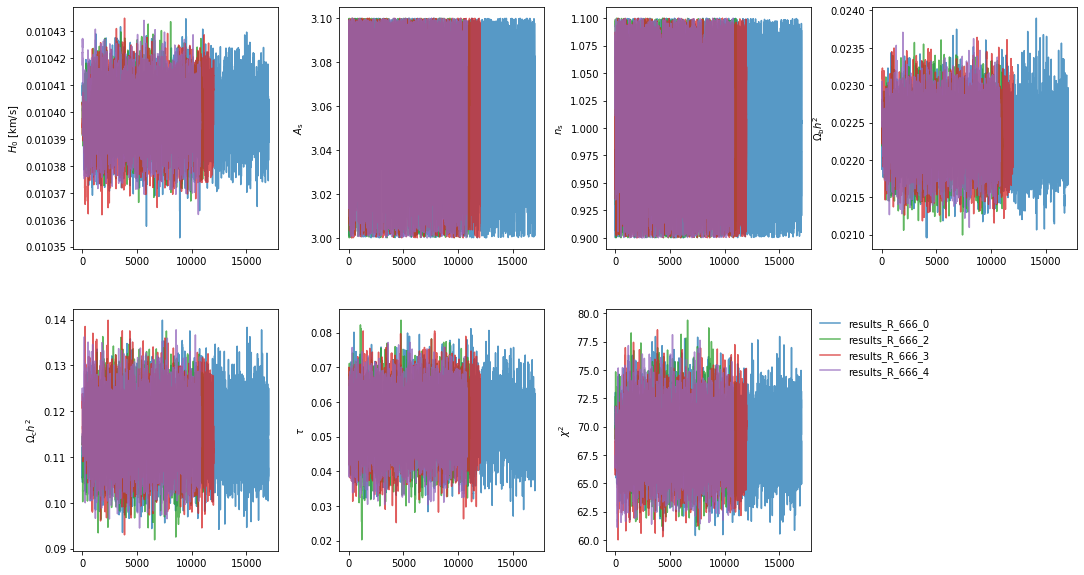

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_noise"
plot_chains(result_path + "/results_R_*/mcmc*.txt", burnin=0, labels=labels)

#### TE



# Out[63]:

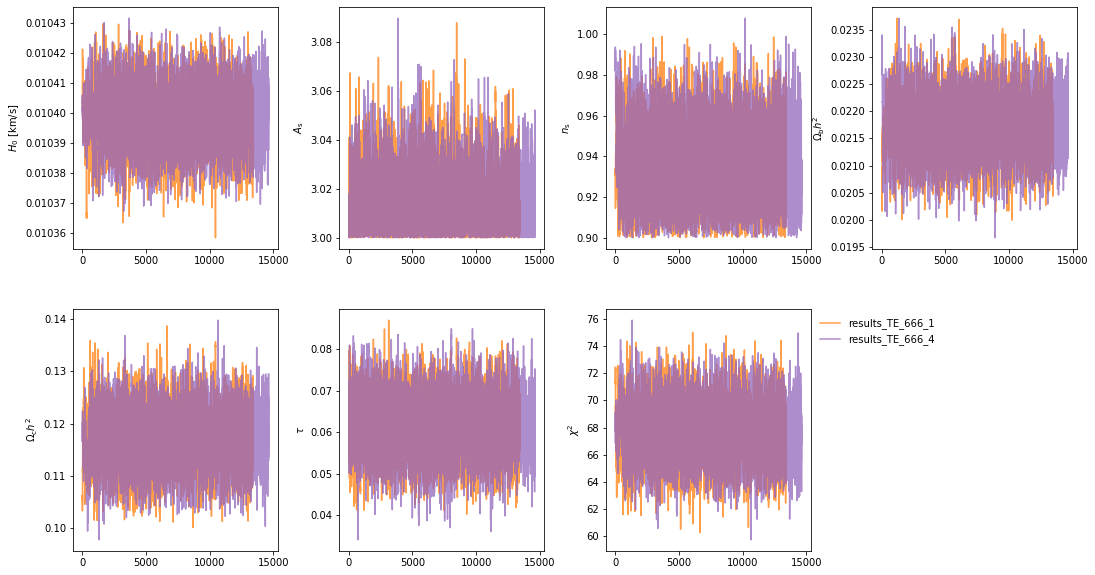

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_noise"
plot_chains(result_path + "/results_TE_*/mcmc*.txt", burnin=0, labels=labels)

#### TT_R_EE



# Out[110]:

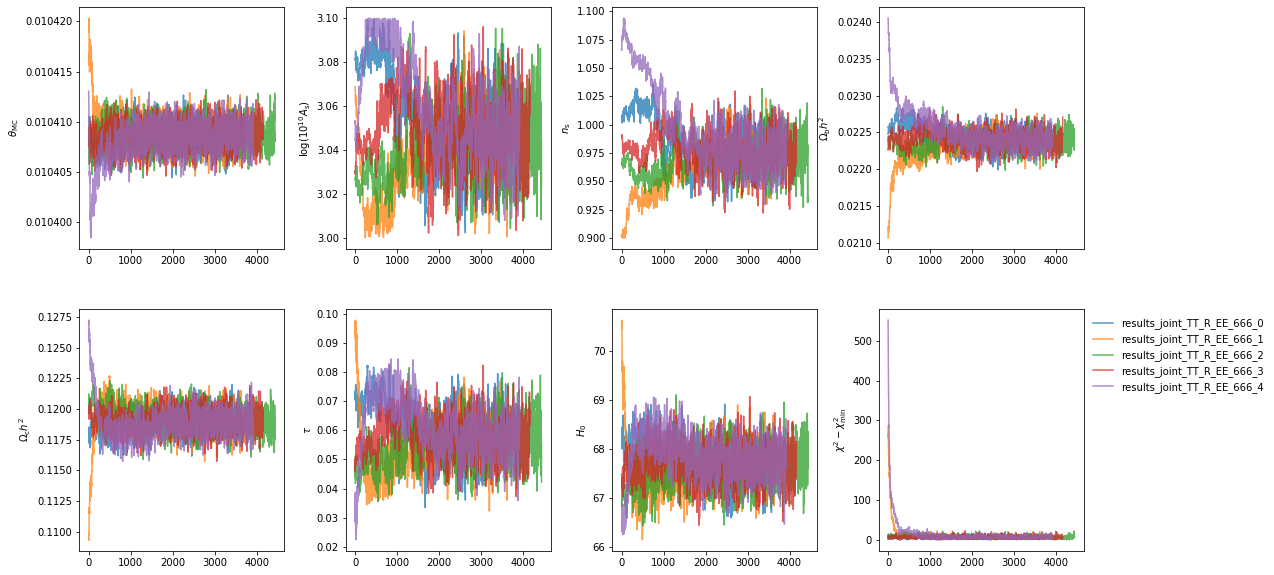

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff"
plot_chains(result_path + "/*_joint_TT_R_EE_*/mcmc*.txt", burnin=0, labels=labels, ncol=4)

#### TT_TE_EE



# Out[65]:

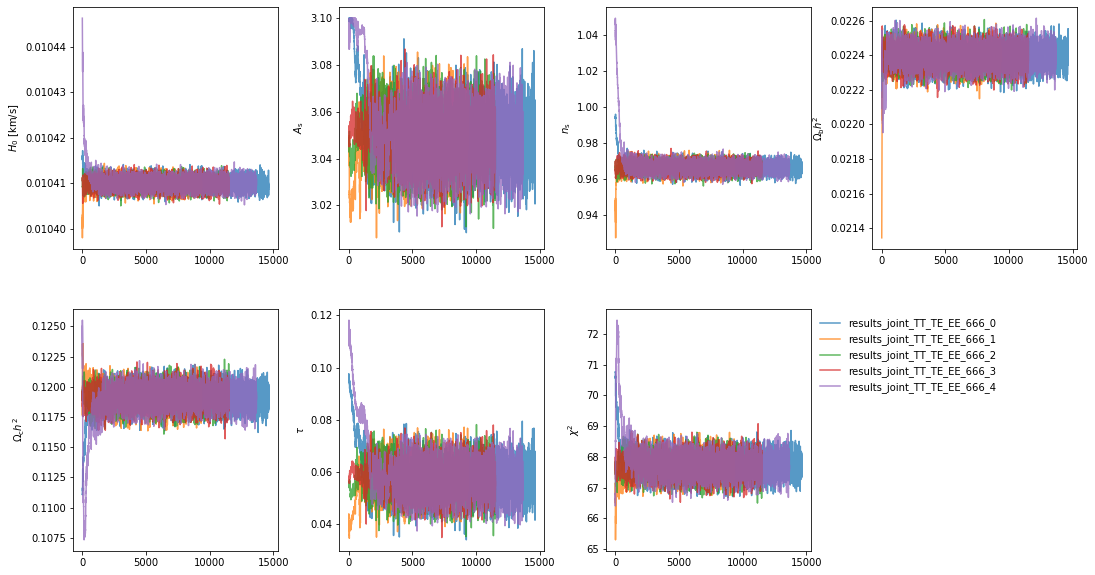

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_noise"
plot_chains(result_path + "/*_joint_TT_TE_EE_*/mcmc*.txt", burnin=0, labels=labels, ncol=4)

### MCMC with systematics



In [1]:
labels = [
  r"$\theta_\mathrm{MC}$",
  r"$\log(10^{10}A_\mathrm{s})$",
  r"$n_\mathrm{s}$",
  r"$\Omega_\mathrm{b}h^2$",
  r"$\Omega_\mathrm{c}h^2$",
  r"$\tau$",
  # r"$A_S$",
  r"$H_0$",
  r"$\chi^2-\chi^2_\mathrm{min}$"]

#### 1% beam + 1% efficiency



In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_beam_1percent_pol_effiency_1percent"

##### R



# Out[14]:

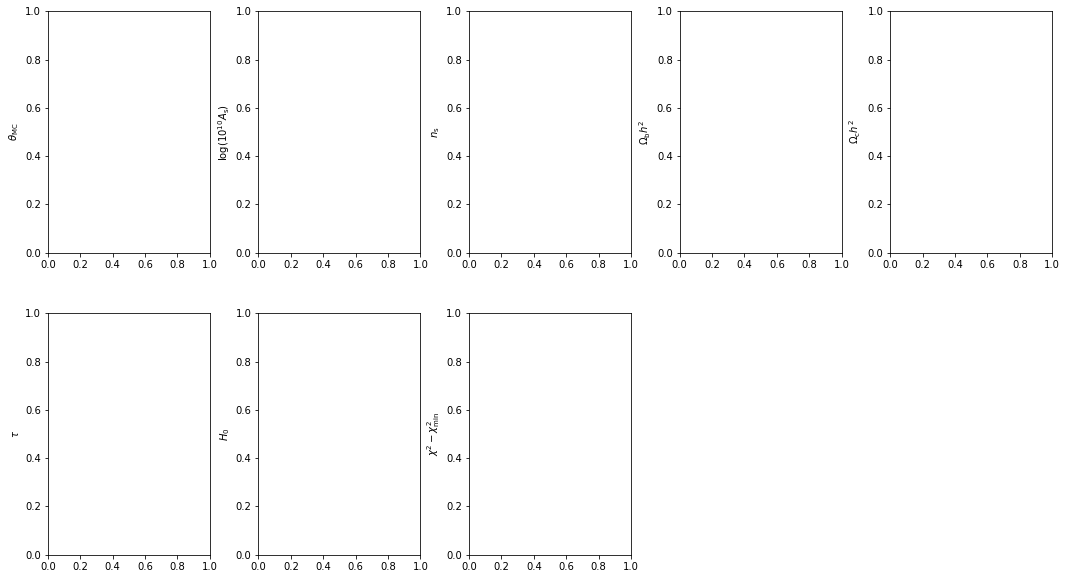

In [1]:
plot_chains(result_path + "/*_R_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

##### TE



# Out[71]:

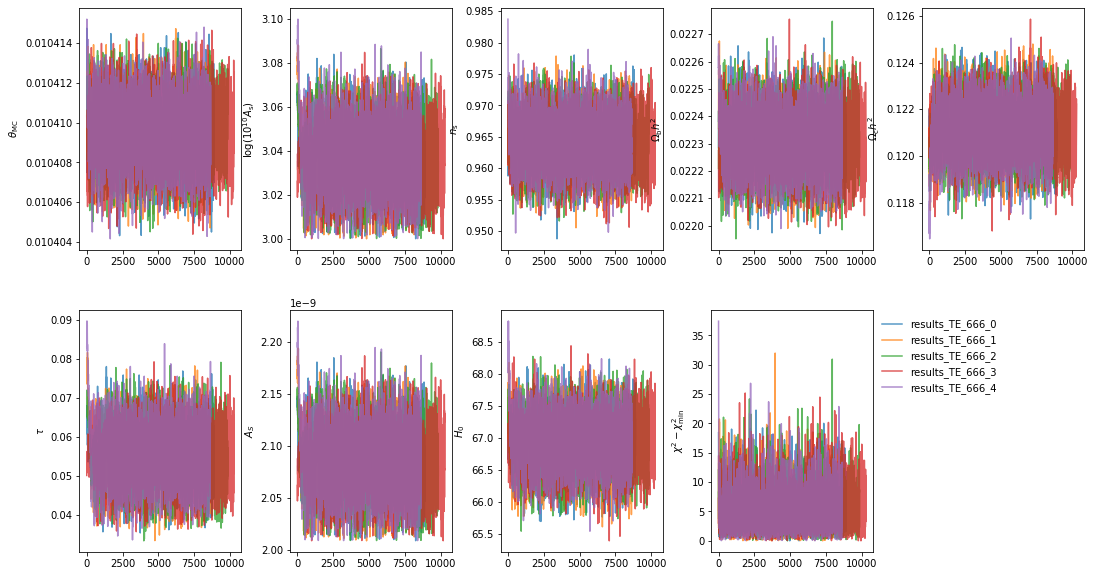

In [1]:
plot_chains(result_path + "/*_TE_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

##### TT_TE_EE



# Out[38]:

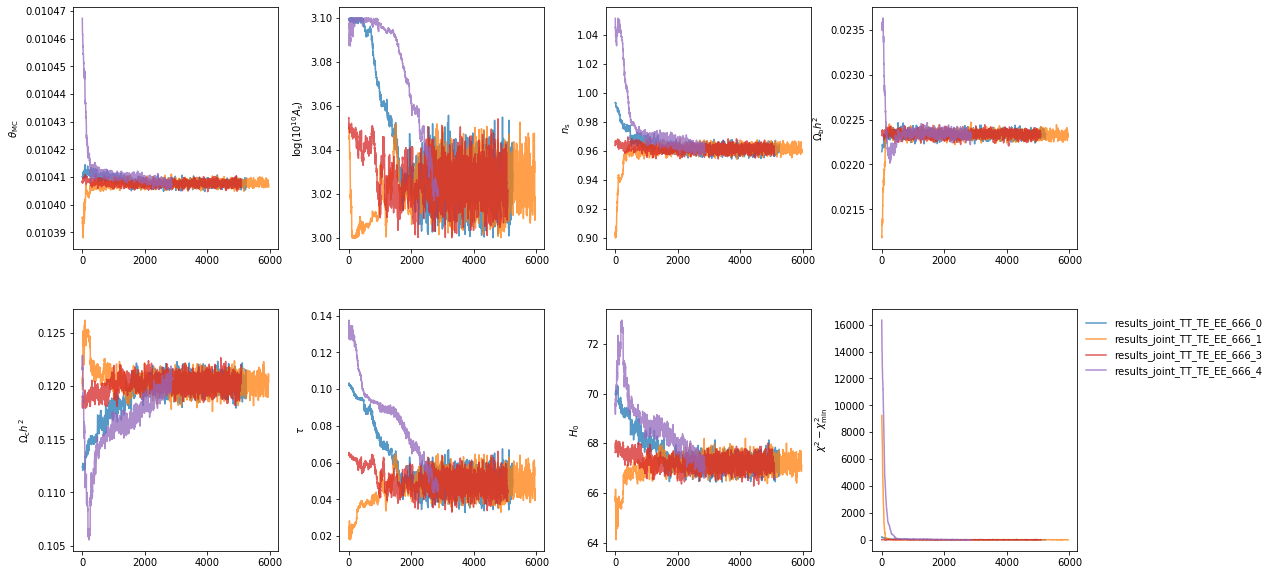

In [1]:
plot_chains(result_path + "/*_joint_TT_TE_EE_*/mcmc*.txt", burnin=0, labels=labels)

In [1]:
plot_chains(result_path + "/*_joint_TT_R_EE_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

##### TT_R_EE



# Out[39]:

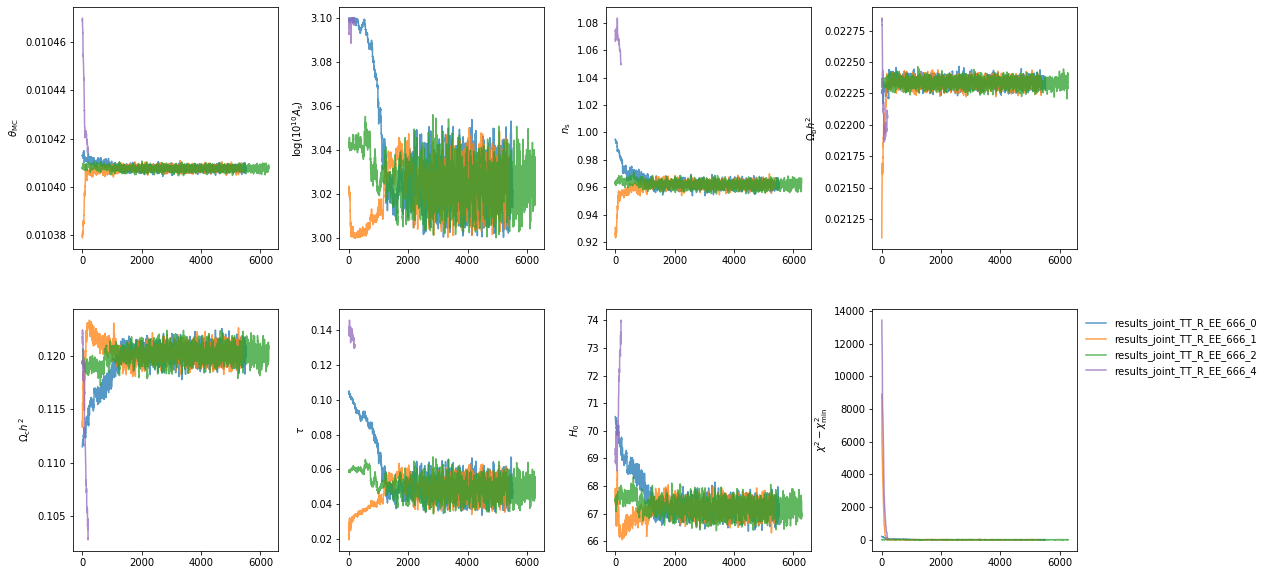

In [1]:
plot_chains(result_path + "/*_joint_TT_R_EE_*/mcmc*.txt", burnin=0, labels=labels)

#### 2% beam + 2% efficiency



In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_beam_2percent_pol_effiency_2percent"

##### R



# Out[21]:

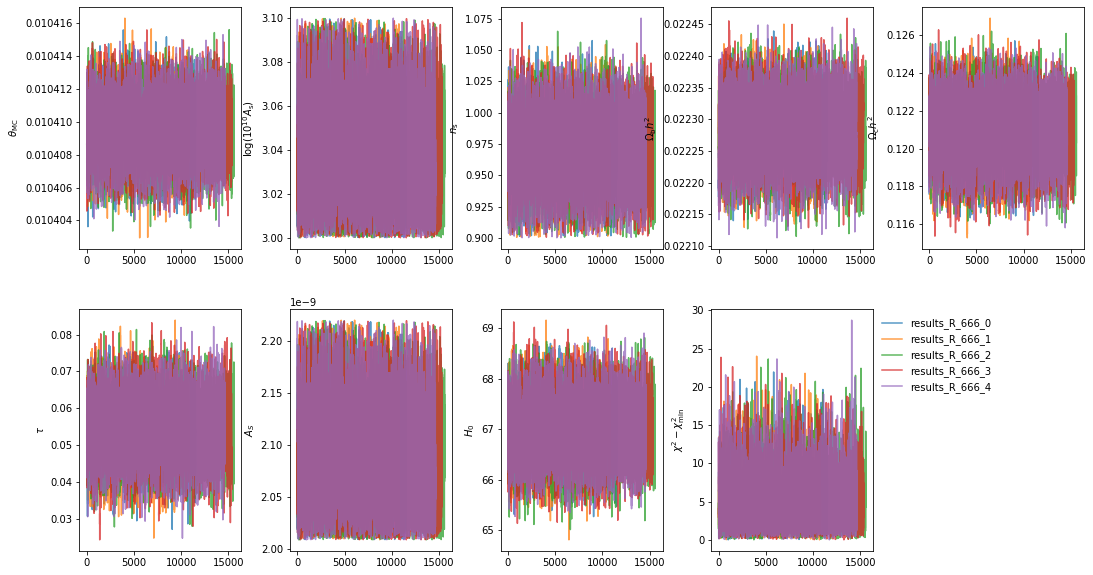

In [1]:
plot_chains(result_path + "/results_R_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

##### TE



# Out[22]:

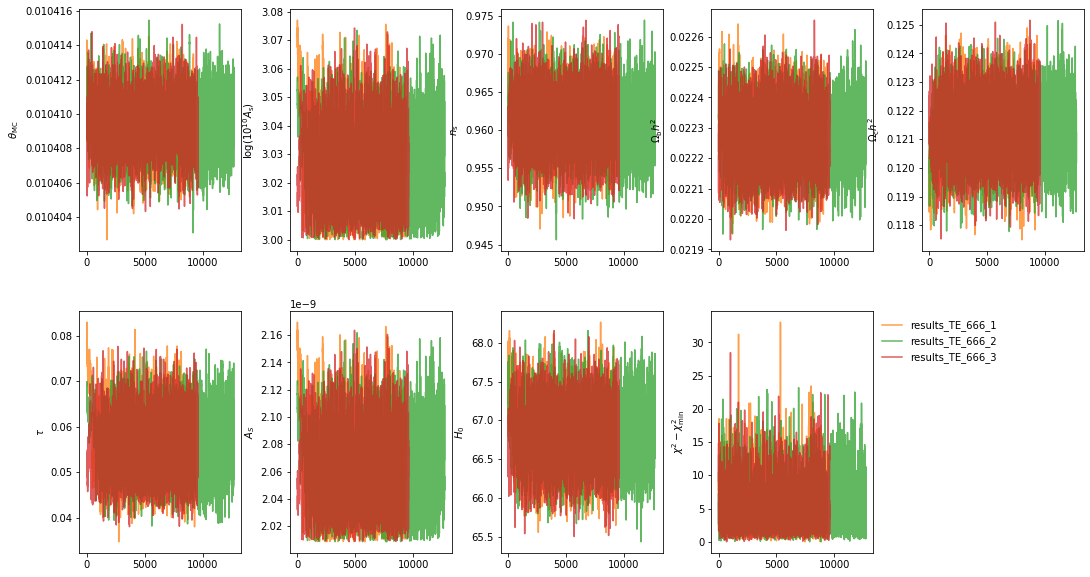

In [1]:
plot_chains(result_path + "/results_TE_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

##### TT_TE_EE



# Out[36]:

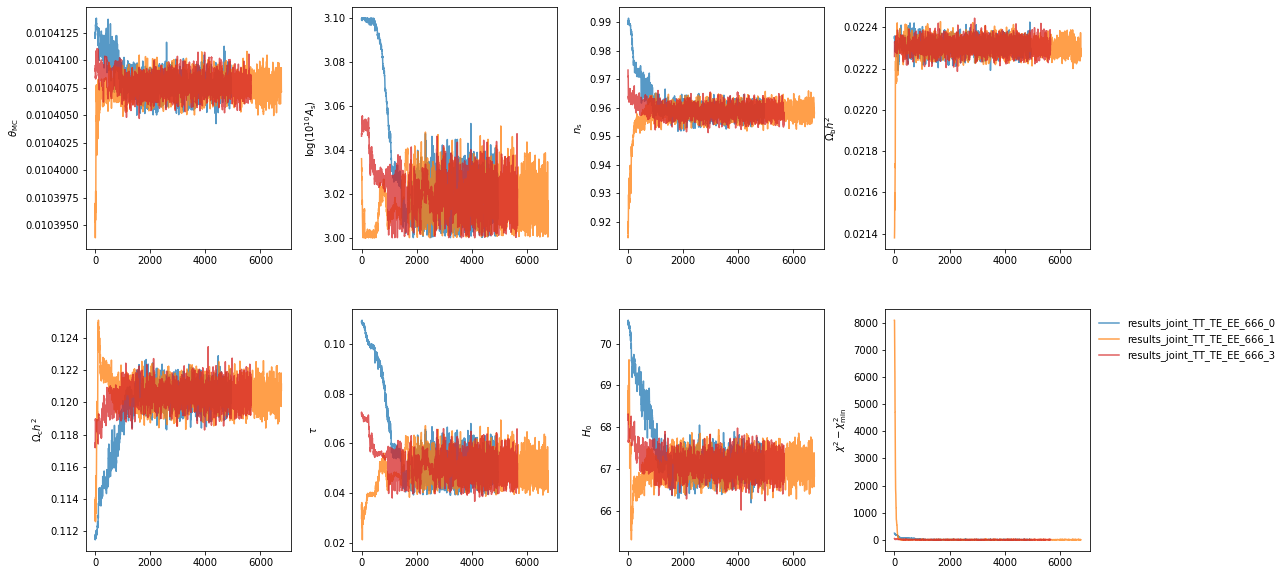

In [1]:
plot_chains(result_path + "/*_TT_TE_EE_*/mcmc*.txt", burnin=0, labels=labels)

##### TT_R_EE



# Out[35]:

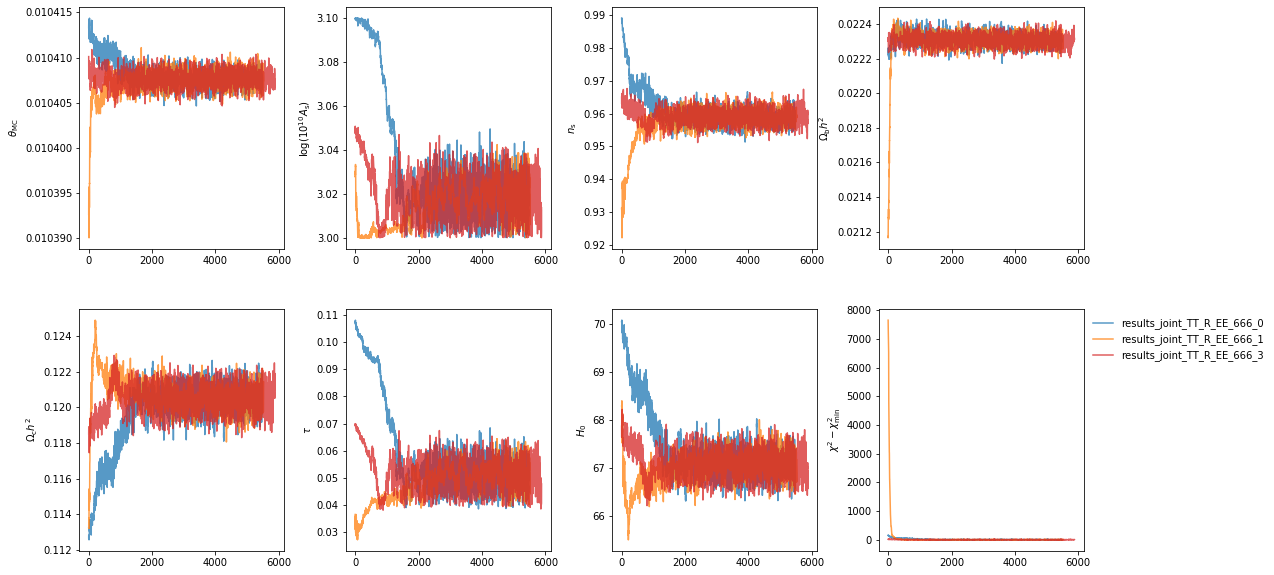

In [1]:
plot_chains(result_path + "/*_TT_R_EE_*/mcmc*.txt", burnin=0, labels=labels)

#### 5% beam + 3% efficiency



In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_beam_5percent_pol_effiency_3percent"

##### R



# Out[25]:

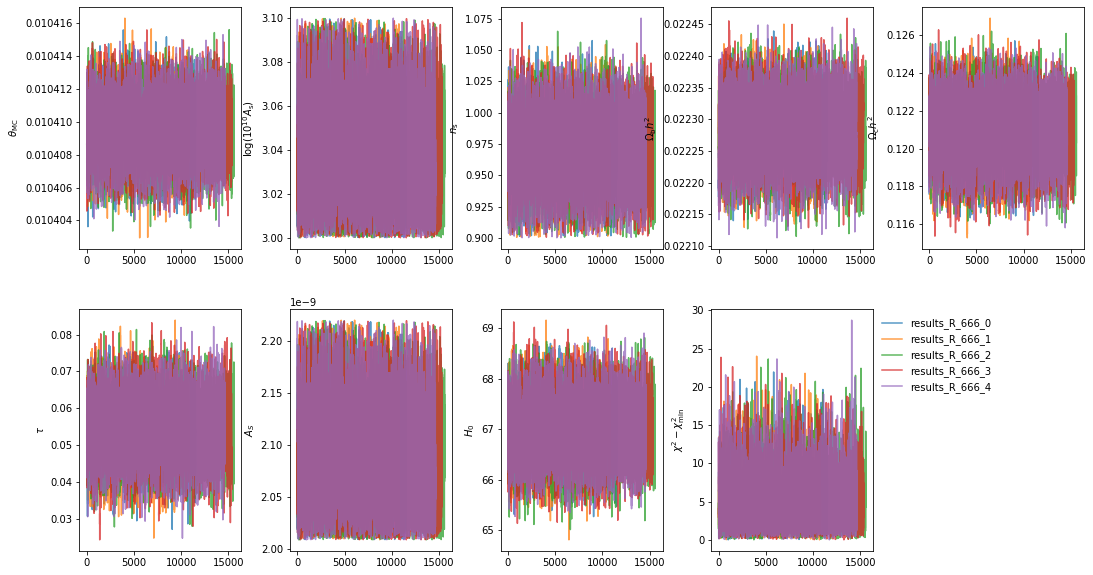

In [1]:
plot_chains(result_path + "/results_R_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

##### TE



# Out[26]:

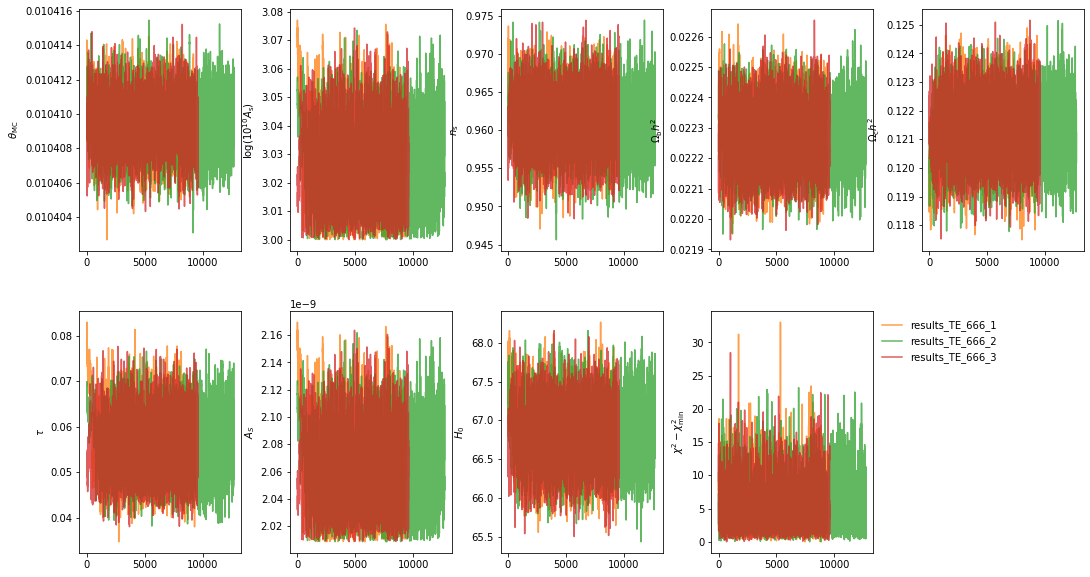

In [1]:
plot_chains(result_path + "/results_TE_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

##### TT_TE_EE



# Out[50]:

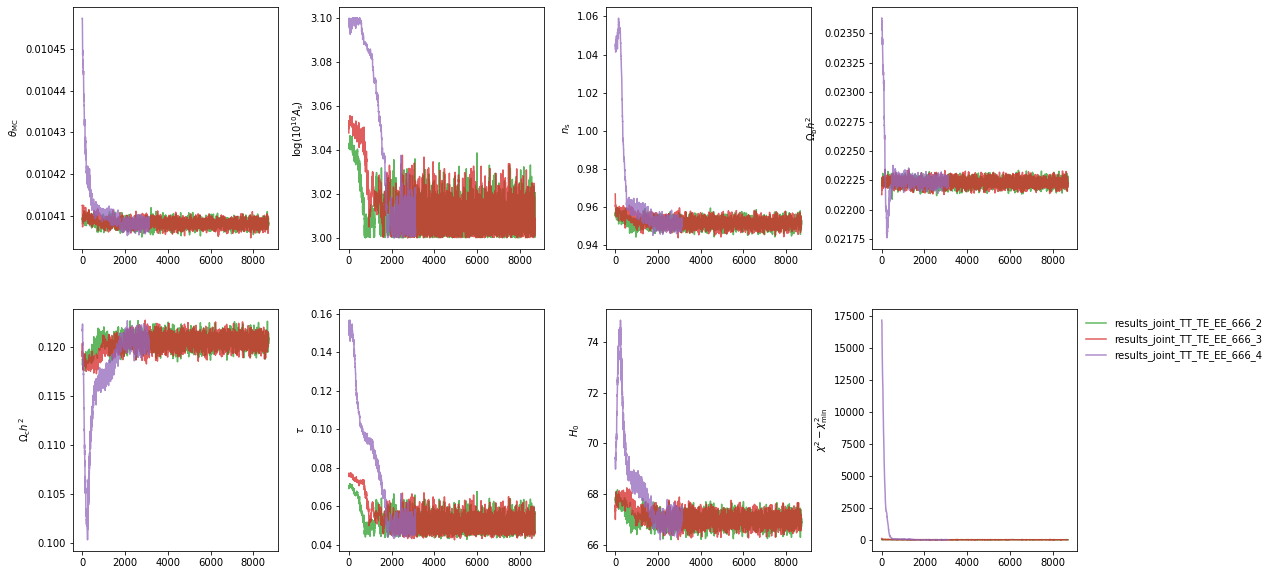

In [1]:
plot_chains(result_path + "/*_TT_TE_EE_*/mcmc*.txt", burnin=0, labels=labels, ncol=4)

##### TT_R_EE



# Out[191]:

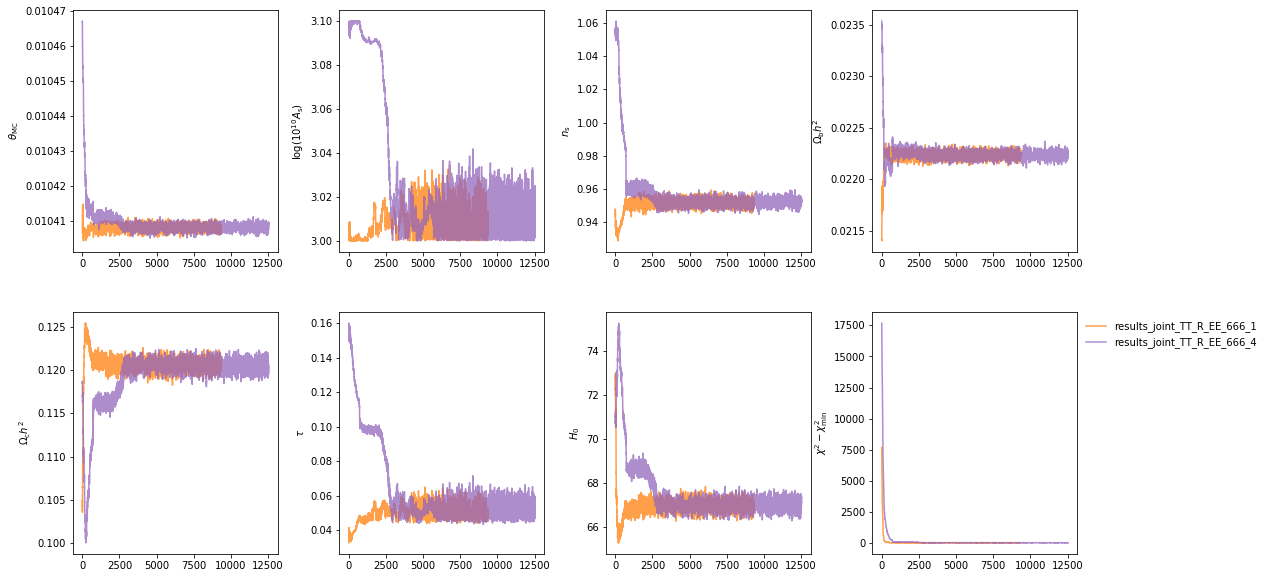

In [1]:
plot_chains(result_path + "/*_TT_R_EE_*/mcmc*.txt", burnin=0, labels=labels)

### MCMC with systematics + noise



In [1]:
labels = [
  r"$\theta_\mathrm{MC}$",
  r"$\log(10^{10}A_\mathrm{s})$",
  r"$n_\mathrm{s}$",
  r"$\Omega_\mathrm{b}h^2$",
  r"$\Omega_\mathrm{c}h^2$",
  r"$\tau$",
  # r"$A_S$",
  r"$H_0$",
  r"$\chi^2-\chi^2_\mathrm{min}$"]

#### 1% beam + 1% efficiency



In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_noise_syst_beam_1percent_pol_efficiency_1percent"

##### R



# Out[19]:

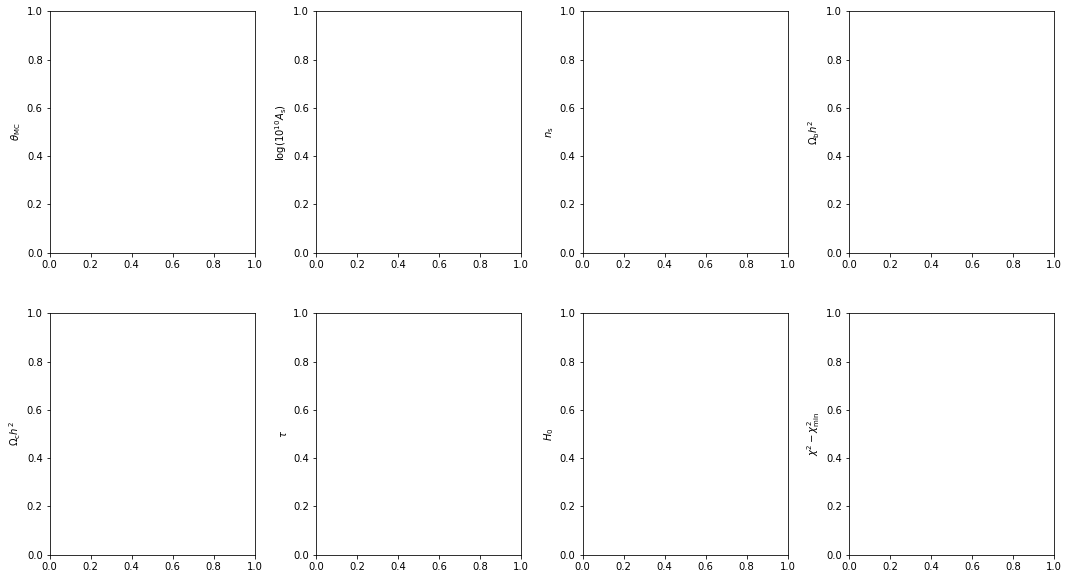

In [1]:
plot_chains(result_path + "/results_R_*/mcmc*.txt", burnin=0, labels=labels)

##### TE



# Out[17]:

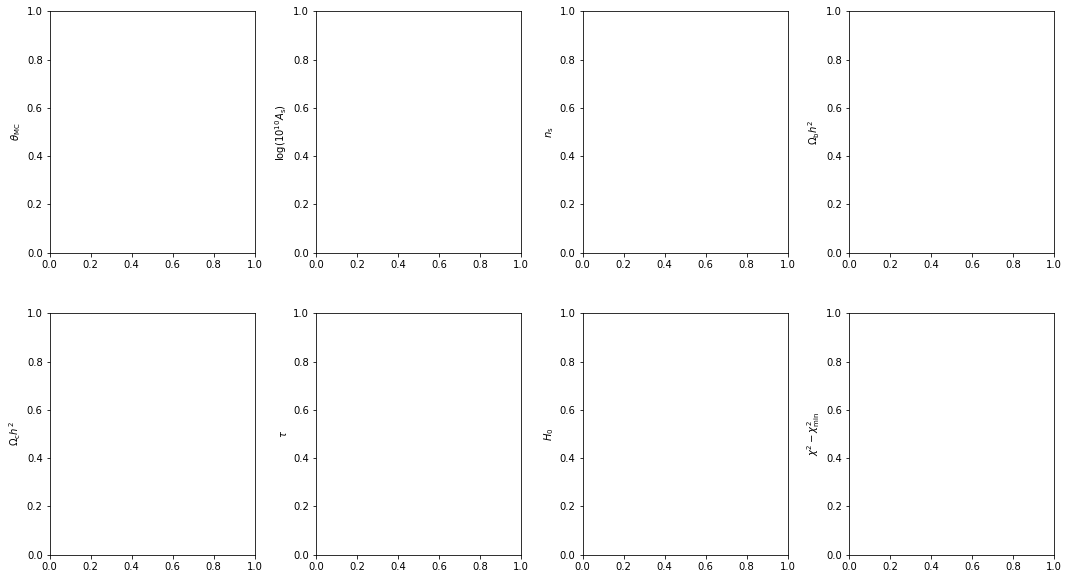

In [1]:
plot_chains(result_path + "/results_TE_*/mcmc*.txt", burnin=0, labels=labels)

##### TT_TE_EE



# Out[202]:

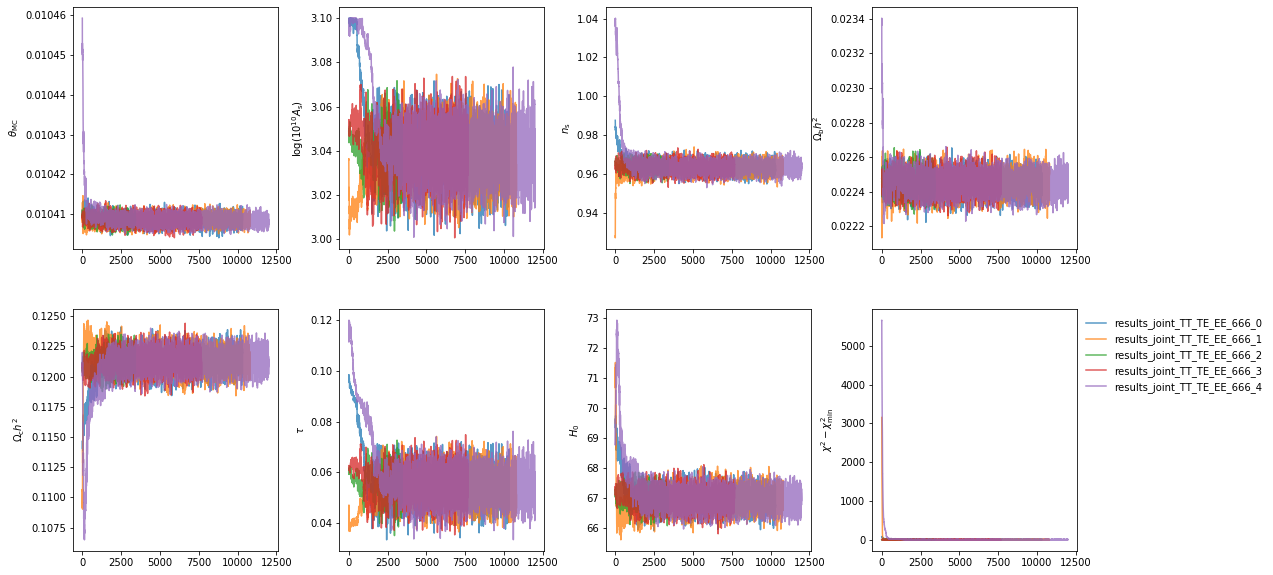

In [1]:
plot_chains(result_path + "/*_joint_TT_TE_EE_*/mcmc*.txt", burnin=0, labels=labels)

##### TT_R_EE



# Out[139]:

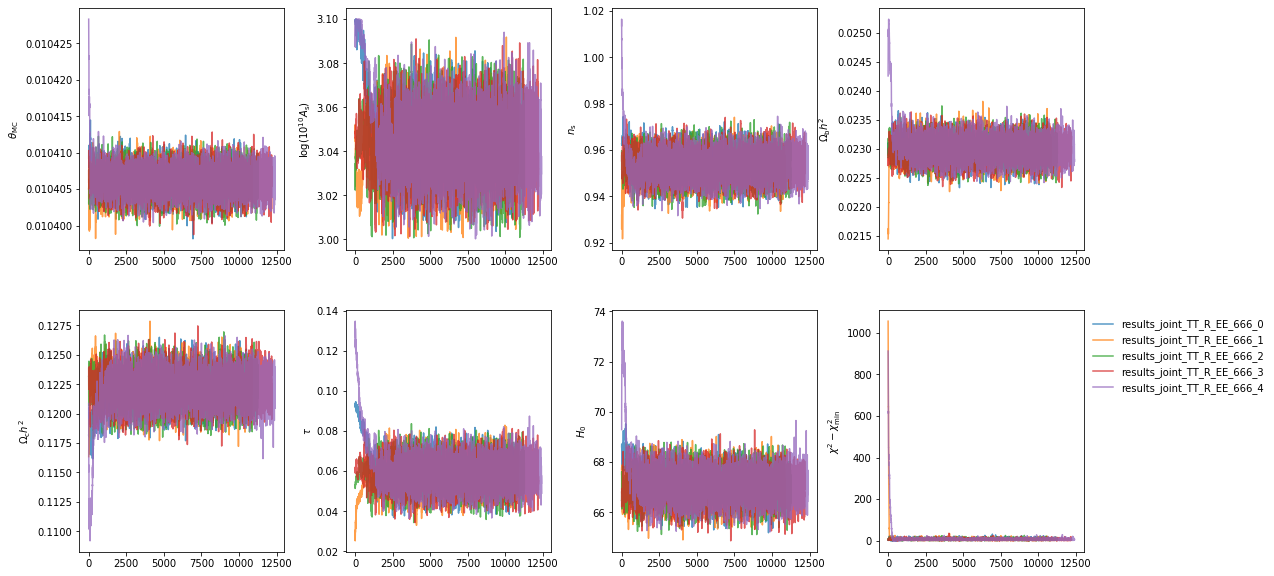

In [1]:
plot_chains(result_path + "/*_joint_TT_R_EE_*/mcmc*.txt", burnin=0, labels=labels)

#### 2% beam + 2% efficiency



In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_noise_syst_beam_2percent_pol_efficiency_2percent"

##### R



# Out[21]:

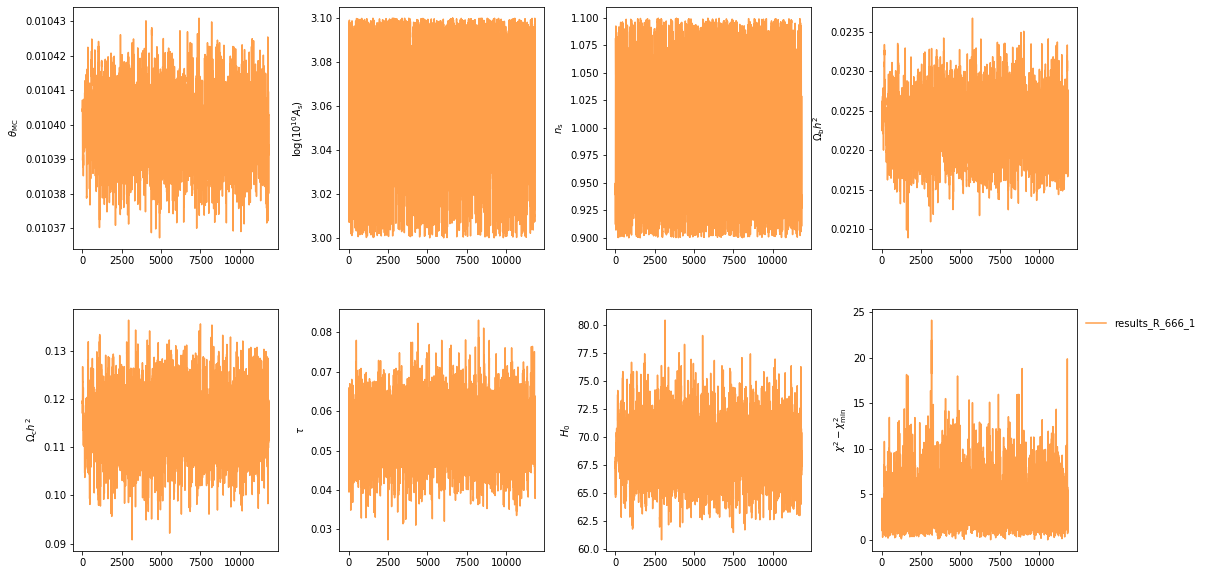

In [1]:
plot_chains(result_path + "/results_R_*/mcmc*.txt", burnin=0, labels=labels)

##### TE



# Out[22]:

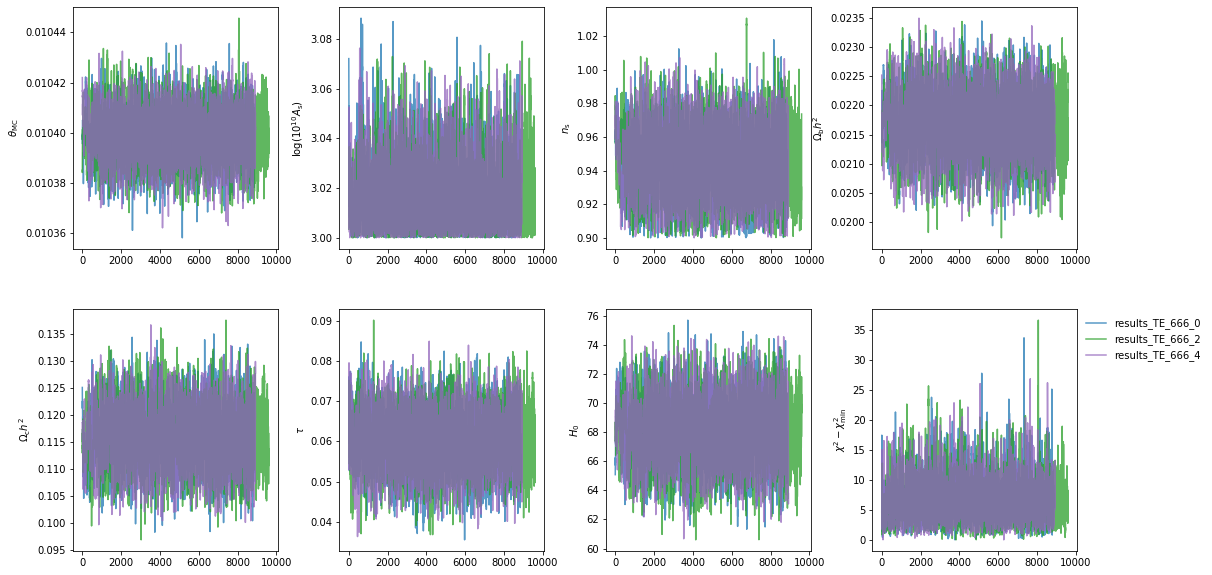

In [1]:
plot_chains(result_path + "/results_TE_*/mcmc*.txt", burnin=0, labels=labels)

##### TT_TE_EE



# Out[210]:

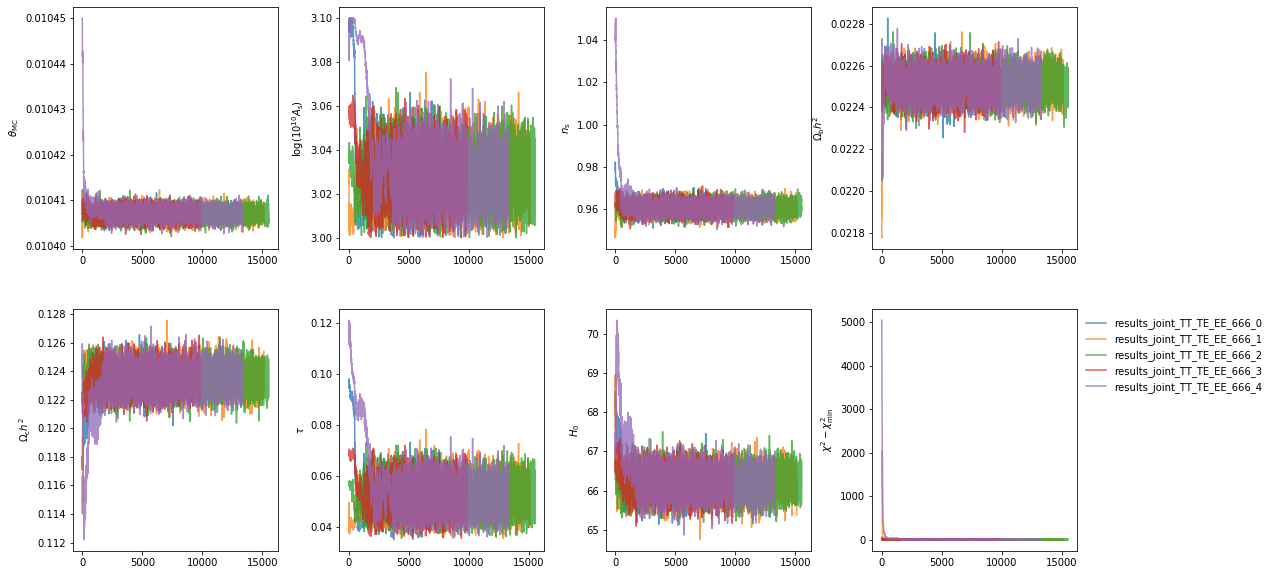

In [1]:
plot_chains(result_path + "/*_TT_TE_EE_*/mcmc*.txt", burnin=0, labels=labels)

##### TT_R_EE



# Out[118]:

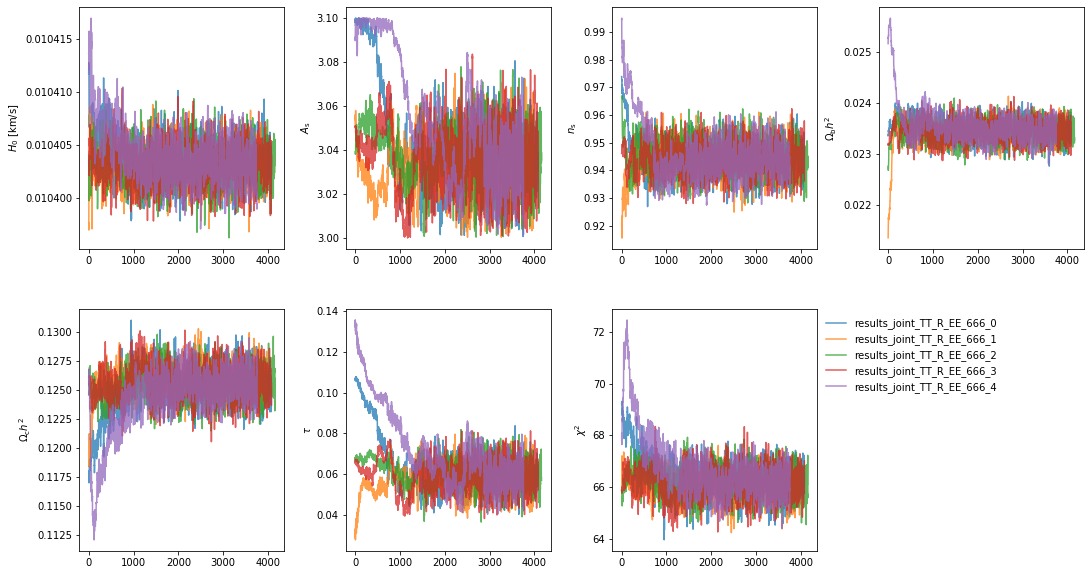

In [1]:
plot_chains(result_path + "/*_TT_R_EE_*/mcmc*.txt", burnin=0, labels=labels)

#### 5% beam + 3% efficiency



In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_noise_syst_beam_5percent_pol_efficiency_3percent"

##### R



# Out[26]:

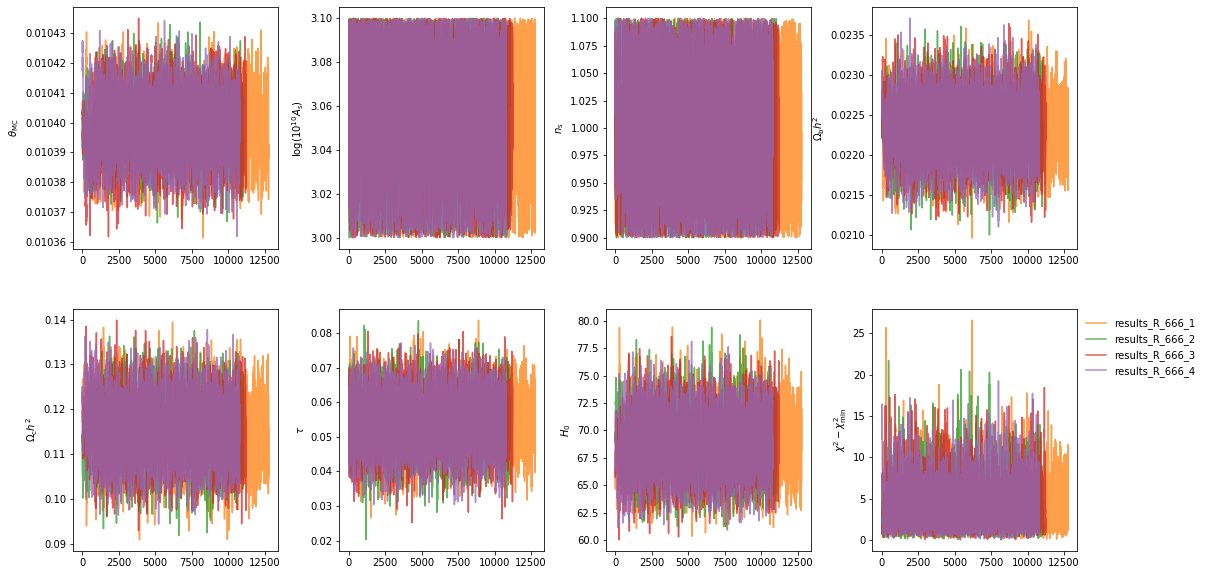

In [1]:
plot_chains(result_path + "/results_R_*/mcmc*.txt", burnin=0, labels=labels)

##### TE



# Out[27]:

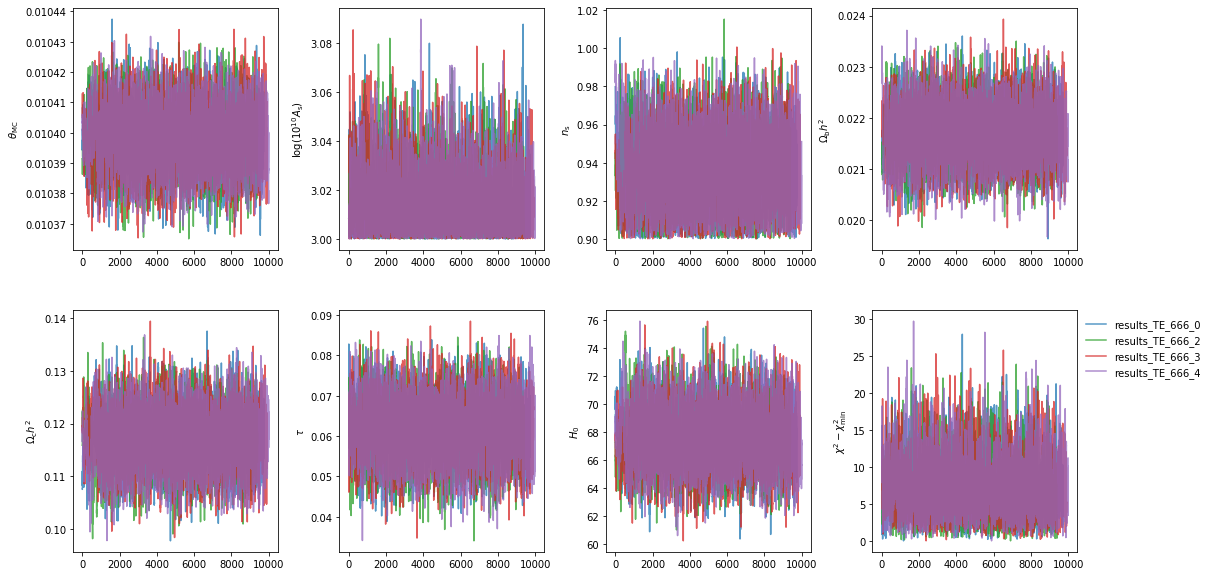

In [1]:
plot_chains(result_path + "/results_TE_*/mcmc*.txt", burnin=0, labels=labels)

##### TT_TE_EE



# Out[214]:

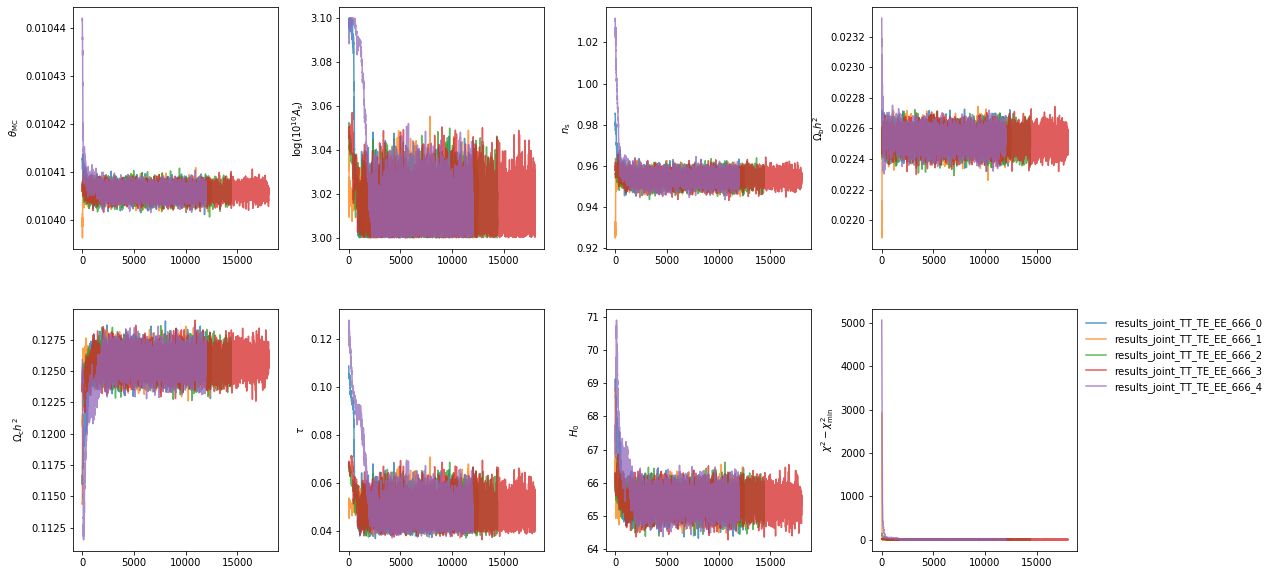

In [1]:
plot_chains(result_path + "/*_TT_TE_EE_*/mcmc*.txt", burnin=0, labels=labels)

##### TT_R_EE



# Out[121]:

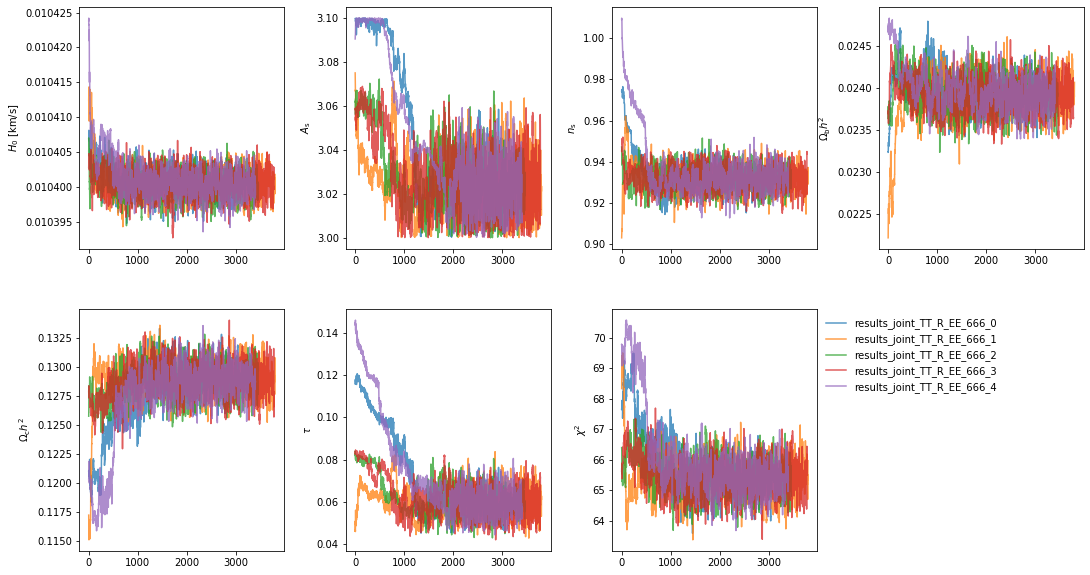

In [1]:
plot_chains(result_path + "/*_TT_R_EE_*/mcmc*.txt", burnin=0, labels=labels)

#### 5% beam + 0% efficiency



In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_noise_syst_beam_5percent_pol_efficiency_0percent"

##### TT_TE_EE



# Out[224]:

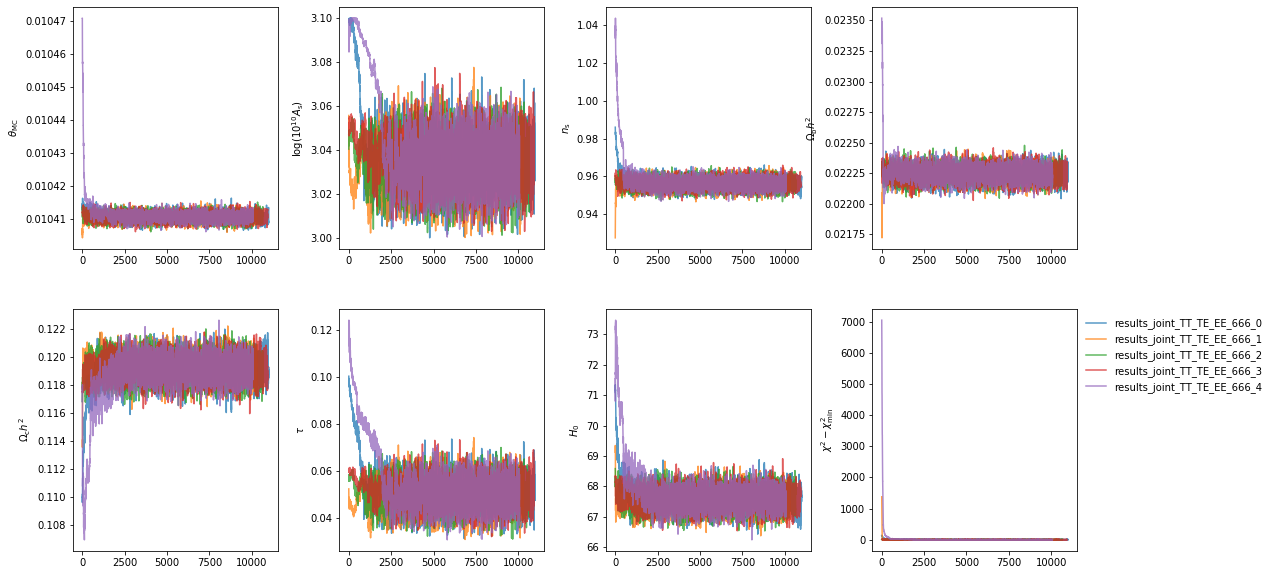

In [1]:
plot_chains(result_path + "/*_TT_TE_EE_*/mcmc*.txt", burnin=0, labels=labels)

#### 0% beam + 3% efficiency



##### TT_TE_EE for SO



# Out[25]:

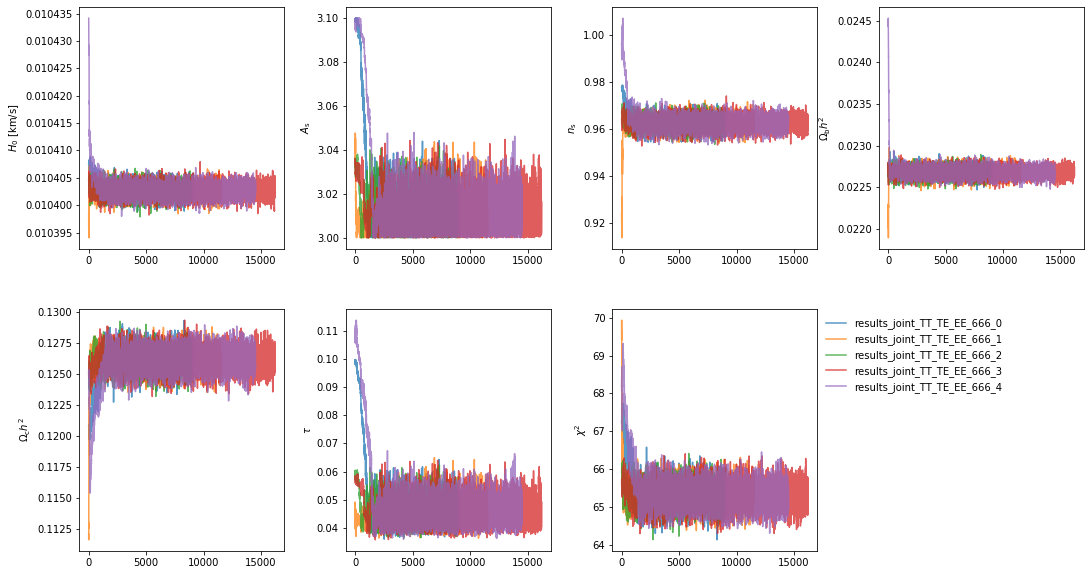

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_unbinned_noise_syst_beam_0percent_pol_efficiency_3percent"
plot_chains(result_path + "/*_TT_TE_EE_*666*/mcmc*.txt", burnin=0, labels=labels)

##### TT_TE_EE for Planck



# Out[11]:

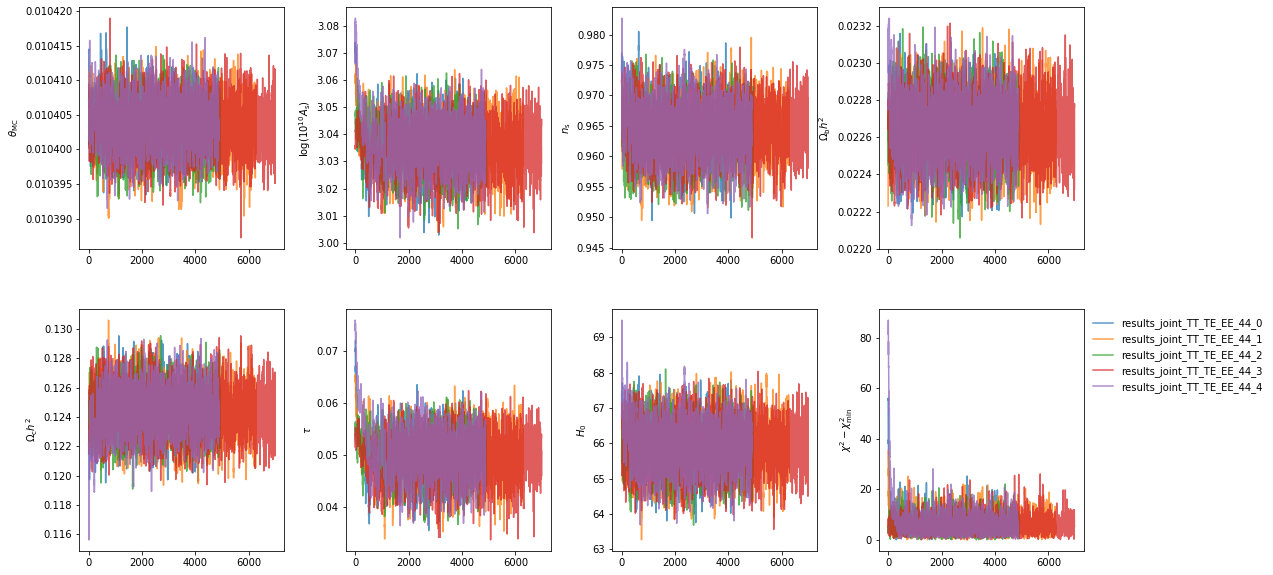

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_unbinned_planck_noise_syst_beam_0percent_pol_efficiency_3percent"
# result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_unbinned_planck_noise"
plot_chains(result_path + "/*_TT_TE_EE_*44*/mcmc*.txt", burnin=0, labels=labels)

## MCMC distributions



In [1]:
def get_mcmc_samples(path, cols=None, labels=None, burnin=0.4, diff=False):
    from getdist import loadMCSamples, MCSamples

    def get_samples(path, cols):
        # Load MC Samples
        tmp = loadMCSamples(path, no_cache=True, settings={"ignore_rows": burnin})

        # Keep only interesting columns i.e. cosmo; parameters
        samples = [tmp.samples[:, i] for i in cols]
        if diff:
            # Get mean diffs as arrays
            mean_diffs = tmp.mean_diffs()
            # Keep only interesting columns i.e. cosmo; parameters
            samples = [mean_diffs[i] for i in cols]
        return MCSamples(samples=samples)

    import glob
    import numpy as np
    mcmcs = glob.glob(path)
    if len(mcmcs) < 2:
        chains = get_samples(mcmcs[0] + "/mcmc", cols).samples
    else:
        chains = np.concatenate([get_samples(i + "/mcmc", cols).samples for i in mcmcs])
    np.random.shuffle(chains)
    return MCSamples(samples=chains, names=labels)

In [1]:
def show_ref(g, ref):
    for i, r in enumerate(ref):
        kwargs = dict(color="gray", ls="--", lw=1)
        for ax in g.subplots[:,i]:
            if ax: ax.axvline(r, **kwargs)
        for ax in g.subplots[i,:i]:
            if ax: ax.axhline(r, **kwargs)

In [1]:
def get_mcmc_samples_old(path, chains, cols, labels, burnin=0.4, diff=False):
    from getdist import loadMCSamples, plots, MCSamples

    def get_samples(path, cols):
        # Load MC Samples
        tmp = loadMCSamples(path, no_cache=True, settings={"ignore_rows": burnin})

        # Keep only interesting columns i.e. cosmo; parameters
        samples = [tmp.samples[:, i] for i in cols]
        if diff:
            # Get mean diffs as arrays
            mean_diffs = tmp.mean_diffs()
            # Keep only interesting columns i.e. cosmo; parameters
            samples = [mean_diffs[i] for i in cols]

        return MCSamples(samples=samples, names=labels)

    samples = []
    for k, v in chains.items():
        mcmc_path = path.format(k, v) + "/mcmc"
        samples += [get_samples(mcmc_path, cols)]
    return samples

### MCMC without \tau prior



# Out[93]:

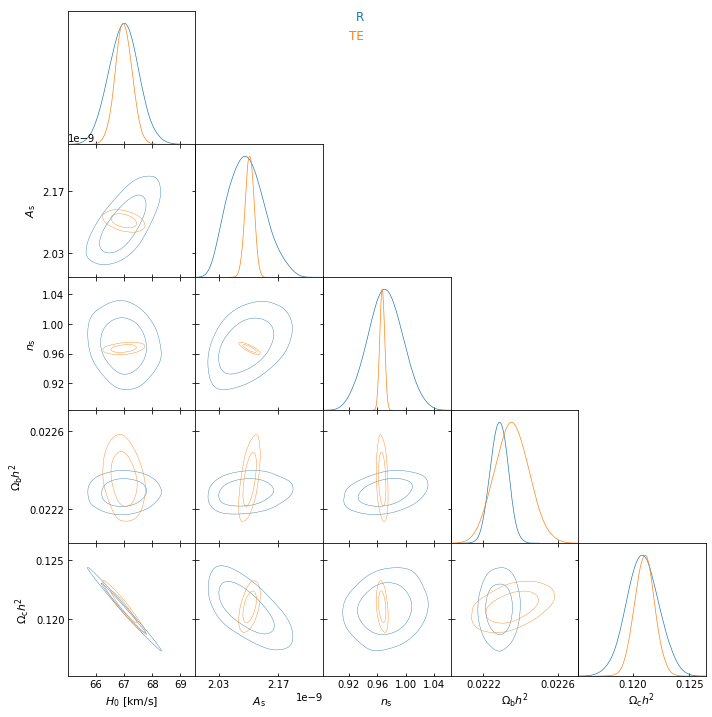

In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$"]
# r"$\Delta\mathrm{A}_\mathrm{L}$"]
tmpl_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff/results_{}_666_{}"

mcmc_study= {"R"  : 4,
             "TE" : 2
}
cols = [6, 5, 2, 3, 4]
samples = get_mcmc_samples(tmpl_path, mcmc_study, cols, labels)

g = plots.getSubplotPlotter()
g.settings.lineM = ["-C{}".format(i) for i in range(10)]
g.triangle_plot(samples, legend_labels=[])
g.add_legend(list(mcmc_study.keys()), colored_text=True, figure=True, align_right=True)

### MCMC with \tau prior



# Out[94]:

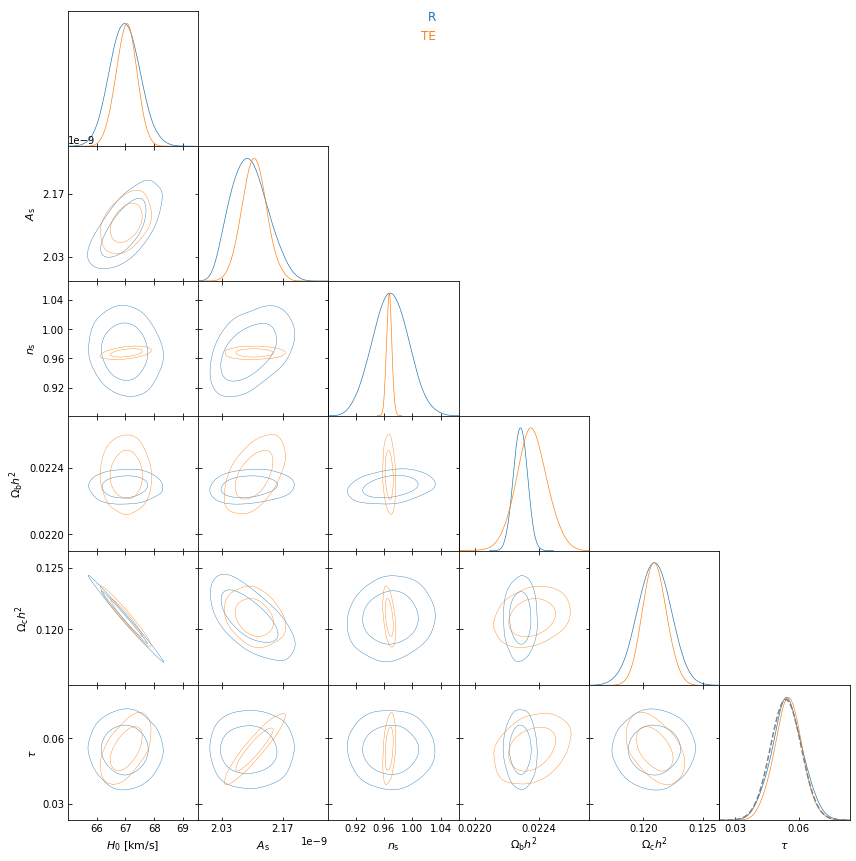

In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$",
          r"$\tau$"]
# r"$\Delta\mathrm{A}_\mathrm{L}$"]
tmpl_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_tau/results_{}_666_{}"

mcmc_study= {"R"  : 0,
             "TE" : 1
}
cols = [7, 6, 2, 3, 4, 5]
samples = get_mcmc_samples(tmpl_path, mcmc_study, cols, labels)

g = plots.getSubplotPlotter()
g.settings.lineM = ["-C{}".format(i) for i in range(10)]
g.triangle_plot(samples, legend_labels=[])
g.add_legend(list(mcmc_study.keys()), colored_text=True, figure=True, align_right=True)

# Show prior on tau
ax = g.subplots[-1, -1]
xmin, xmax, ymin, ymax = ax.axis()
x = np.linspace(xmin, xmax, 100)
from scipy.stats import norm
ax.plot(x, 0.018*norm.pdf(x, 0.054, 0.0073), color='gray', ls='--')
#  g.export("triangle_plot.pdf")

### MCMC for joint analysis



Load samples



In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$",
          r"$\tau$" ,
          r"$\chi^2$"
]
# r"$\Delta\mathrm{A}_\mathrm{L}$"]

chains = {
    "no noise": {"joint_TT_R_EE": 2, "joint_TT_TE_EE": 0},
    "no systematics": {"joint_TT_R_EE": 1, "joint_TT_TE_EE": 0},
    # "beam_1percent_pol_efficiency_1percent": {"joint_TT_R_EE": 4, "joint_TT_TE_EE": 4},
    "beam_2percent_pol_efficiency_2percent": {"joint_TT_R_EE": 2, "joint_TT_TE_EE": 1},
    # "beam_5percent_pol_efficiency_3percent": {"joint_TT_R_EE": 3, "joint_TT_TE_EE": 3}
}

cols = [7, 6, 2, 3, 4, 5, -1]
samples = []
for k1, v1 in chains.items():
    if k1 == "no systematics":
      path = "/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_noise/results_{}_666_{}"
    elif k1 == "no noise":
      path = "/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff/results_{}_666_{}"
    else:
        tmpl_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_noise_syst_{}"
        path = tmpl_path.format(k1) + "/results_{}_666_{}"
    samples += get_mcmc_samples(path, v1, cols, labels)
    # print(k1, v1, samples[0].samples[:, :-2])
    # print(k1, v1, samples[-1].getMeans())

Triangle plot



# Out[154]:

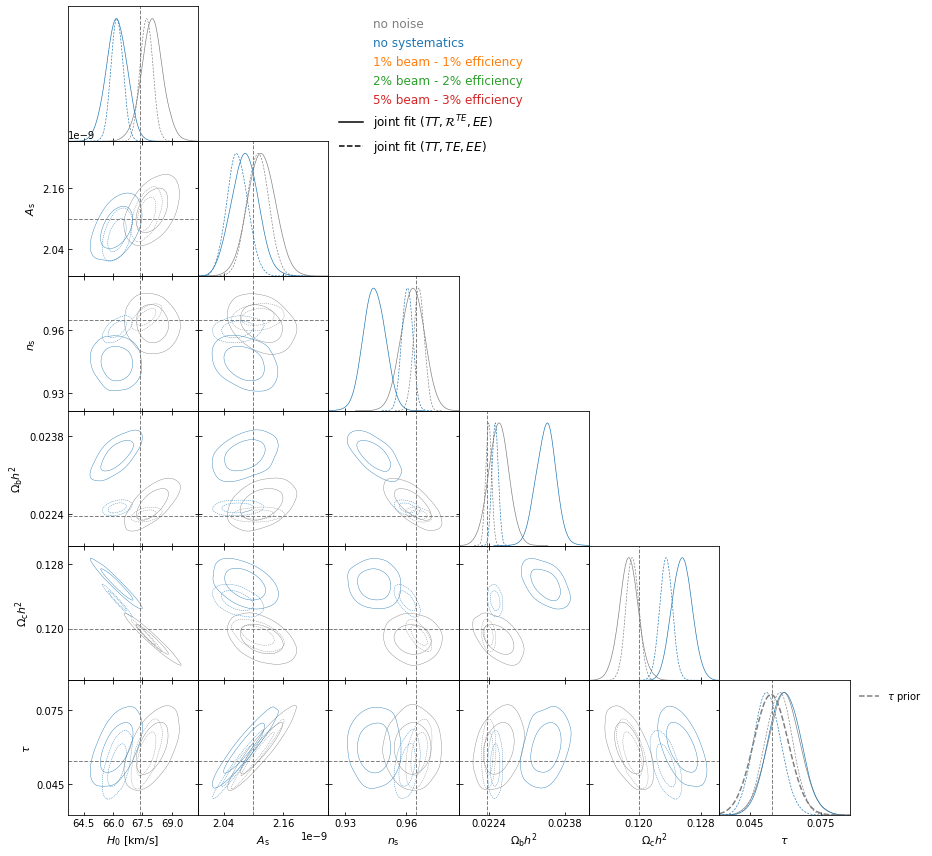

In [1]:
g = plots.getSubplotPlotter()
g.settings.lineM = ["-gray", "--gray"]
for i in range(4):
    g.settings.lineM += ["-C{}".format(i), "--C{}".format(i)]
g.triangle_plot(samples, labels[:-1], legend_labels=[])
# Add special legend
ax = g.subplots[0, 0]
from matplotlib.lines import Line2D
leg = ax.legend(5*[Line2D([], [], lw=0)] + [Line2D([], [], color="k", ls="-"), Line2D([], [], color="k", ls="--")],
                ["no noise", "no systematics", "1% beam - 1% efficiency", "2% beam - 2% efficiency", "5% beam - 3% efficiency",
                 r"joint fit $(TT, \mathcal{R}^{TE}, EE)$", "joint fit $(TT, TE, EE)$"],
                loc="upper left", bbox_to_anchor=(2,1), fontsize="large", ncol=1)
for i, t in enumerate(leg.texts[:-2]):
  t.set_color("gray") if i == 0 else t.set_color("C{}".format(i-1))
# g.add_legend(["1% beam - 1% efficiency", "", "2% beam - 2% efficiency", "", "5% beam - 3% efficiency"],
#              colored_text=True, figure=True, align_right=True)

# Show prior on tau
ax = g.subplots[-1, -1]
xmin, xmax, ymin, ymax = ax.axis()
x = np.linspace(xmin, xmax, 100)
from scipy.stats import norm
ax.plot(x, 0.018*norm.pdf(x, 0.054, 0.0073), color='gray', ls='--', label=r"$\tau$ prior")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

ref = [67.36, np.exp(3.044)/1e10, 0.9649, 0.02237, 0.1200, 0.0544]
show_ref(g, ref)

# Out[148]:

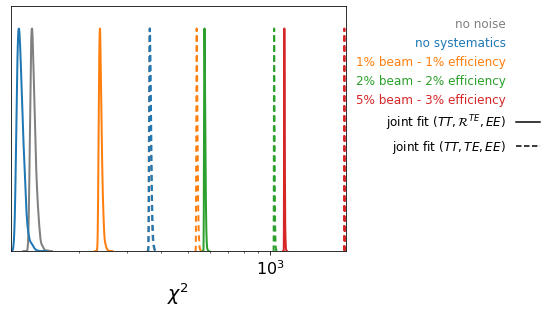

In [1]:
g = plots.getSinglePlotter()
g.settings.lineM = ["-gray", "--gray"]
for i in range(4):
    g.settings.lineM += ["-C{}".format(i), "--C{}".format(i)]
g.plot_1d(samples, "$\chi^2$")
ax = g.fig.axes[-1]
ax.set_xscale("log")
leg = ax.legend(5*[Line2D([], [], lw=0)] + [Line2D([], [], color="k", ls="-"), Line2D([], [], color="k", ls="--")],
                ["no noise", "no systematics", "1% beam - 1% efficiency", "2% beam - 2% efficiency", "5% beam - 3% efficiency",
                 r"joint fit $(TT, \mathcal{R}^{TE}, EE)$", "joint fit $(TT, TE, EE)$"],
                loc="upper left", bbox_to_anchor=(1,1), fontsize="large", ncol=1, markerfirst=False)
for i, t in enumerate(leg.texts[:-2]):
  t.set_color("gray") if i == 0 else t.set_color("C{}".format(i-1))

In [1]:
from copy import deepcopy
best_fits = deepcopy(systematics)
i = 0
for k1, v1 in systematics.items():
    for k2, v2 in v1.items():
        sample = samples[i].samples
        best_fit = sample[np.argmin(samples[-1])]
        best_fits[k1][k2] = {"chain": v2, "chi2": best_fit[-1], "pars": best_fit[:-1]}
        i+=1
print(best_fits)

# Out[219]:

### MCMC for binned vs unbinned TT,TE,EE



Load samples



In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$",
          r"$\tau$" ,
          r"$\chi^2$"
]
# r"$\Delta\mathrm{A}_\mathrm{L}$"]

chains = {
    "no noise": {"joint_TT_TE_EE": 2},
    "no noise (unbinned)": {"joint_TT_TE_EE": 0},
    "no systematics": {"joint_TT_TE_EE": 0},
    "no systematics (unbinned)": {"joint_TT_TE_EE": 3},
    "beam_1percent_pol_efficiency_1percent": {"joint_TT_TE_EE": 4},
    "beam_1percent_pol_efficiency_1percent (unbinned)": {"joint_TT_TE_EE": 3},
    "beam_2percent_pol_efficiency_2percent": {"joint_TT_TE_EE": 2},
    "beam_2percent_pol_efficiency_2percent (unbinned)": {"joint_TT_TE_EE": 3},
    "beam_5percent_pol_efficiency_3percent": {"joint_TT_TE_EE": 3},
    "beam_5percent_pol_efficiency_3percent (unbinned)": {"joint_TT_TE_EE": 1}
}

cols = [7, 6, 2, 3, 4, 5, -1]
samples = []
for k1, v1 in chains.items():
    output_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/"
    if "unbinned" in k1:
      output_path += "mcmc_corrcoeff_unbinned"
      k1 = k1.replace(" (unbinned)","")
    else:
      output_path += "mcmc_corrcoeff"

    if k1 == "no noise":
      path = output_path + r"/results_{}_666_{}"
    elif k1 == "no systematics":
      path = output_path + r"_noise/results_{}_666_{}"
    else:
        tmpl_path = output_path + r"_noise_syst_{}"
        path = tmpl_path.format(k1) + r"/results_{}_666_{}"
    samples += get_mcmc_samples(path, v1, cols, labels)
    # print(k1, v1, samples[0].samples[:, :-2])
    # print(k1, v1, samples[-1].getMeans())

Triangle plot



# Out[177]:

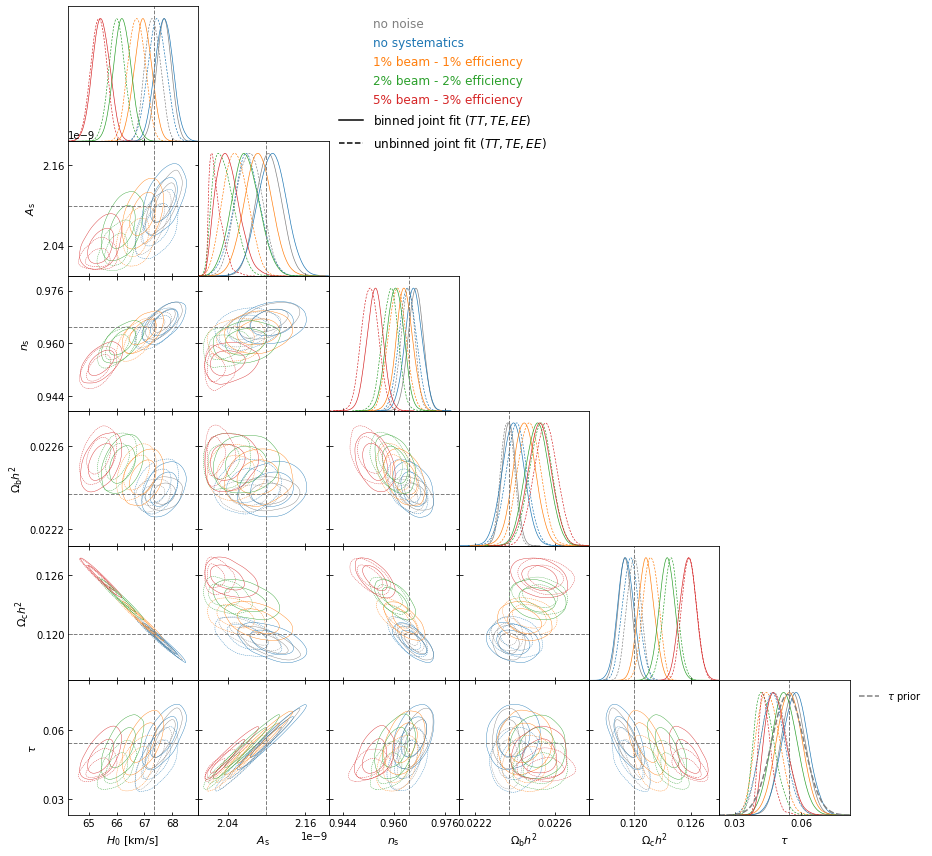

In [1]:
g = plots.getSubplotPlotter()
g.settings.lineM = ["-gray", "--gray"]
for i in range(4):
    g.settings.lineM += ["-C{}".format(i), "--C{}".format(i)]
g.triangle_plot(samples, labels[:-1], legend_labels=[])
# Add special legend
ax = g.subplots[0, 0]
from matplotlib.lines import Line2D
leg = ax.legend(5*[Line2D([], [], lw=0)] + [Line2D([], [], color="k", ls="-"), Line2D([], [], color="k", ls="--")],
                ["no noise", "no systematics", "1% beam - 1% efficiency", "2% beam - 2% efficiency", "5% beam - 3% efficiency",
                 r"binned joint fit $(TT, TE, EE)$", r"unbinned joint fit $(TT, TE, EE)$"],
                loc="upper left", bbox_to_anchor=(2,1), fontsize="large", ncol=1)
for i, t in enumerate(leg.texts[:-2]):
  t.set_color("gray") if i == 0 else t.set_color("C{}".format(i-1))
# g.add_legend(["1% beam - 1% efficiency", "", "2% beam - 2% efficiency", "", "5% beam - 3% efficiency"],
#              colored_text=True, figure=True, align_right=True)

# Show prior on tau
ax = g.subplots[-1, -1]
xmin, xmax, ymin, ymax = ax.axis()
x = np.linspace(xmin, xmax, 100)
from scipy.stats import norm
ax.plot(x, 0.018*norm.pdf(x, 0.054, 0.0073), color='gray', ls='--', label=r"$\tau$ prior")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

ref = [67.36, np.exp(3.044)/1e10, 0.9649, 0.02237, 0.1200, 0.0544]
show_ref(g, ref)

# Out[221]:

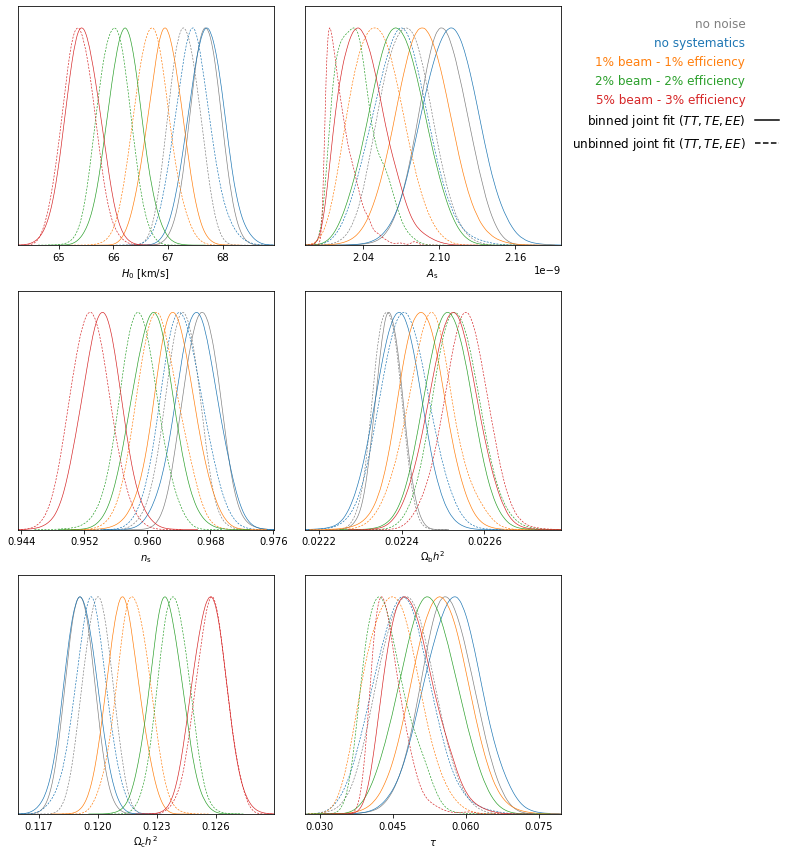

In [1]:
g = plots.getSubplotPlotter(width_inch=8)
g.settings.lineM = ["-gray", "--gray"]
for i in range(4):
    g.settings.lineM += ["-C{}".format(i), "--C{}".format(i)]
g.plots_1d(samples, labels[0:-1], legend_labels=[], nx=2)
ax = g.subplots[0, -1]
leg = ax.legend(5*[Line2D([], [], lw=0)] + [Line2D([], [], color="k", ls="-"), Line2D([], [], color="k", ls="--")],
                ["no noise", "no systematics", "1% beam - 1% efficiency", "2% beam - 2% efficiency", "5% beam - 3% efficiency",
                 r"binned joint fit $(TT, TE, EE)$", r"unbinned joint fit $(TT, TE, EE)$"],
                loc="upper left", bbox_to_anchor=(1,1), fontsize="large", ncol=1, markerfirst=False)
for i, t in enumerate(leg.texts[:-2]):
  t.set_color("gray") if i == 0 else t.set_color("C{}".format(i-1))

### MCMC for unbinned TT,TE,EE and systematics for SO



Load samples



In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$",
          r"$\tau$" ,
          r"$\chi^2$"
]

output_path = "/home/garrido/Workdir/CMB/analysis/corrcoeff/output/"
chains = {
    "no systematics": output_path + "mcmc_corrcoeff_unbinned_noise/results_joint_TT_TE_EE_666_[0-4]",
    # "5% beam - 3% efficiency": output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_5percent_pol_efficiency_3percent/results_joint_TT_TE_EE_666_[0-4]",
    # "5% beam - 0% efficiency": output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_5percent_pol_efficiency_0percent/results_joint_TT_TE_EE_666_[0-4]",
    "0% beam - 3% efficiency 1": output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_0percent_pol_efficiency_3percent/results_joint_TT_TE_EE_666_[0-4]",
    "0% beam - 3% efficiency 2": output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_0percent_pol_efficiency_3percent/results_joint_TT_TE_EE_69_[0-4]",
    "0% beam - 3% efficiency 3": output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_0percent_pol_efficiency_3percent/results_joint_TT_TE_EE_44_[0-4]",
    "0% beam - 3% efficiency ($\ell_{\mathrm{min}}$ = 2)": output_path + "mcmc_corrcoeff_unbinned_lmin2_noise_syst_beam_0percent_pol_efficiency_3percent/results_joint_TT_TE_EE_666_[0-4]"
}

cols = [7, 6, 2, 3, 4, 5, -1]
samples = [get_mcmc_samples(path, cols=cols, labels=labels) for path in chains.values()]

Triangle plot



# Out[27]:

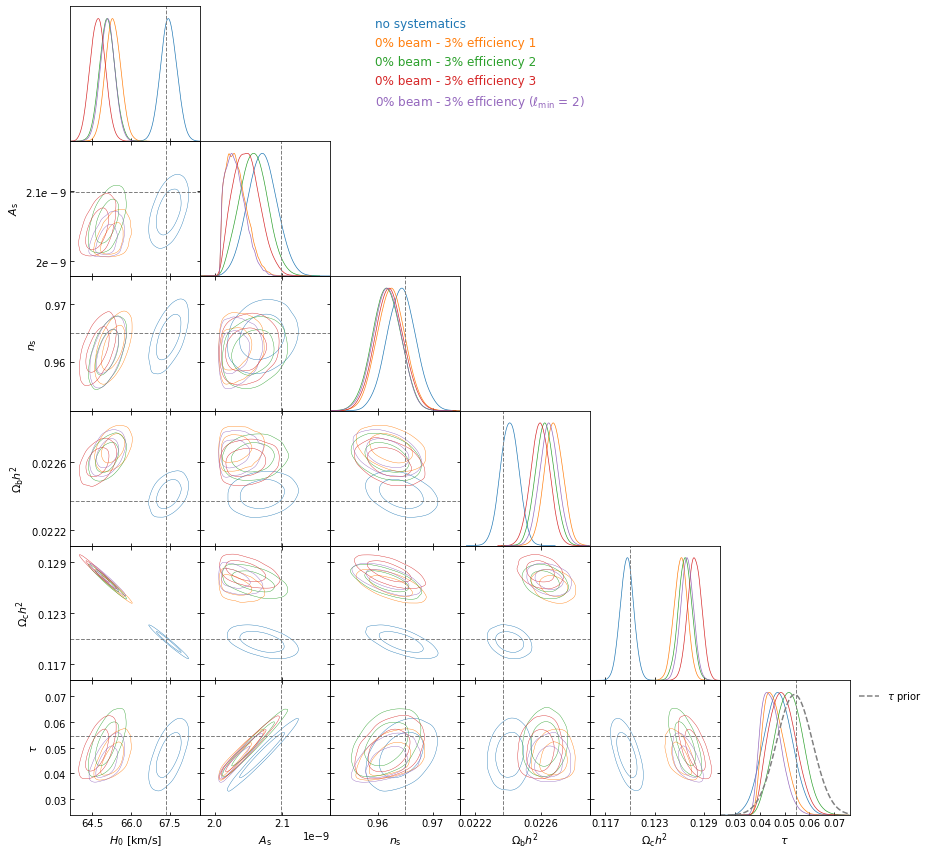

In [1]:
g = plots.getSubplotPlotter()
g.settings.lineM = ["-C{}".format(i) for i in range(10)]
g.triangle_plot(samples, labels[:-1], legend_labels=[])
# Add special legend
ax = g.subplots[0, 0]
from matplotlib.lines import Line2D
leg = ax.legend(len(chains)*[Line2D([], [], lw=0)], chains.keys(),
                loc="upper left", bbox_to_anchor=(2,1), fontsize="large", ncol=1)
for i, t in enumerate(leg.texts):
  t.set_color(g.settings.lineM[i].strip("-"))

# Show prior on tau
ax = g.subplots[-1, -1]
xmin, xmax, ymin, ymax = ax.axis()
x = np.linspace(xmin, xmax, 100)
from scipy.stats import norm
ax.plot(x, 0.018*norm.pdf(x, 0.054, 0.0073), color='gray', ls='--', label=r"$\tau$ prior")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

ref = [67.36, np.exp(3.044)/1e10, 0.9649, 0.02237, 0.1200, 0.0544]
show_ref(g, ref)

#### Compare \chi^2



# Out[13]:

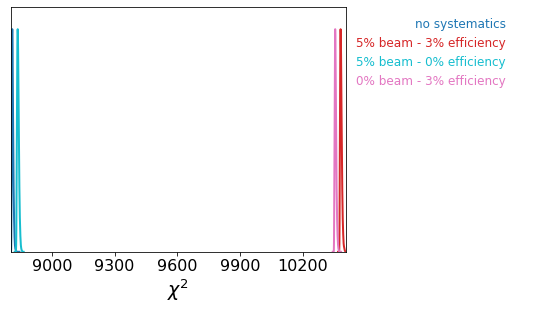

In [1]:
g = plots.getSinglePlotter()
g.settings.lineM = ["-C0", "-C3", "-C9", "-C6"]
g.plot_1d(samples, "$\chi^2$")
ax = g.fig.axes[-1]
leg = ax.legend(len(chains)*[Line2D([], [], lw=0)], chains.keys(),
                loc="upper left", bbox_to_anchor=(1,1), fontsize="large", ncol=1, markerfirst=False)
for i, t in enumerate(leg.texts):
  t.set_color(g.settings.lineM[i].strip("-"))

#### Compare spectra



In [1]:
import pickle

output_path = "/home/garrido/Workdir/CMB/analysis/corrcoeff/output/"
# No systematics
d = pickle.load(open(output_path + "mcmc_corrcoeff_unbinned_noise/results_joint_TT_TE_EE_666_1/setup.pkl", "rb"))
ls = d["setup"]["simulation"]["ls"]
Cls_no_syst = d["setup"]["simulation"]["Cl"]
# 5% - 3%
d = pickle.load(open(output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_5percent_pol_efficiency_3percent/results_joint_TT_TE_EE_666_0/setup.pkl", "rb"))
Cls_5percent_3percent = d["setup"]["simulation"]["Cl"]
# 5% - 0%
d = pickle.load(open(output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_5percent_pol_efficiency_0percent/results_joint_TT_TE_EE_666_0/setup.pkl", "rb"))
Cls_5percent_0percent = d["setup"]["simulation"]["Cl"]
# 0% - 3%
d = pickle.load(open(output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_0percent_pol_efficiency_3percent/results_joint_TT_TE_EE_666_0/setup.pkl", "rb"))
Cls_0percent_3percent = d["setup"]["simulation"]["Cl"]

# Out[20]:

# Out[21]:

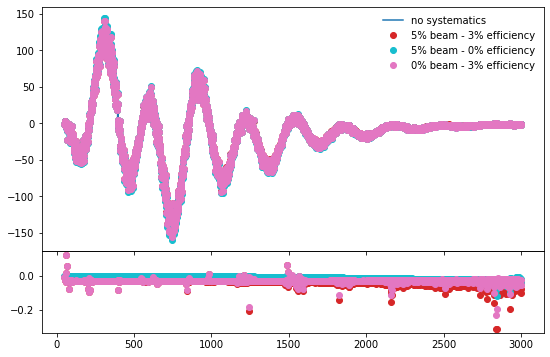

In [1]:
i = 1 #0: TT, 1: TE, 2: EE
plt.figure(figsize=(9,6))
grid = plt.GridSpec(4, 1, hspace=0, wspace=0)
main = plt.subplot(grid[0:3], xticklabels=[])
fac = ls*(ls+1)/(2*np.pi)
main.plot(ls, Cls_no_syst[i]*fac, label="no systematics")
main.plot(ls, Cls_5percent_3percent[i]*fac, "oC3", label="5% beam - 3% efficiency")
main.plot(ls, Cls_5percent_0percent[i]*fac, "oC9", label="5% beam - 0% efficiency")
main.plot(ls, Cls_0percent_3percent[i]*fac, "oC6", label="0% beam - 3% efficiency")
dev = plt.subplot(grid[-1])
dev.plot(ls, Cls_5percent_3percent[i]/Cls_no_syst[i]-1, "oC3")
dev.plot(ls, Cls_5percent_0percent[i]/Cls_no_syst[i]-1, "oC9")
dev.plot(ls, Cls_0percent_3percent[i]/Cls_no_syst[i]-1, "oC6")
main.legend(bbox_to_anchor=(1,1))

In [1]:
import yaml
with open("../yaml/corrcoeff.yaml", "r") as stream:
    setup = yaml.load(stream)

# for i, (k,v) in enumerate(chains.items()):
#   sample = samples[i].samples
#   id_bf = np.argmin(sample[:,-1])
#   pars = sample[id_bf]
#   cosmo_params = setup["simulation"]["cosmo. parameters"]
#   del cosmo_params["cosmomc_theta"]
#   cosmo_params["H0"] = pars[0]
#   cosmo_params["As"] = pars[1]
#   cosmo_params["ns"] = pars[2]
#   cosmo_params["ombh2"] = pars[3]
#   cosmo_params["omch2"] = pars[4]
#   cosmo_params["tau"] = pars[5]

  # import ../corrcoeff/utils
  # Cls_mod = utils.get_theory_cls(setup_mod, lmax)
  # Cl_tt_mod = Cls_mod["tt"][lmin:lmax]
  # Cl_te_mod = Cls_mod["te"][lmin:lmax]
  # Cl_ee_mod = Cls_mod["ee"][lmin:lmax]

  # print(k, sample[id_bf])

# Out[33]:

### MCMC for unbinned TT,TE,EE and systematics for Planck



Load samples



In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$",
          r"$\tau$" ,
          r"$\chi^2$"
]

output_path = "/home/garrido/Workdir/CMB/analysis/corrcoeff/output/"
chains = {
    "Planck - no systematics": output_path + "mcmc_corrcoeff_unbinned_planck_noise/results_joint_TT_TE_EE_44_[0-4]",
    "Planck - 0% beam - 3% efficiency": output_path + "mcmc_corrcoeff_unbinned_planck_noise_syst_beam_0percent_pol_efficiency_3percent/results_joint_TT_TE_EE_44_[0-4]"
}

cols = [7, 6, 2, 3, 4, 5, -1]
samples = [get_mcmc_samples(path, cols=cols, labels=labels) for path in chains.values()]

Triangle plot



# Out[6]:

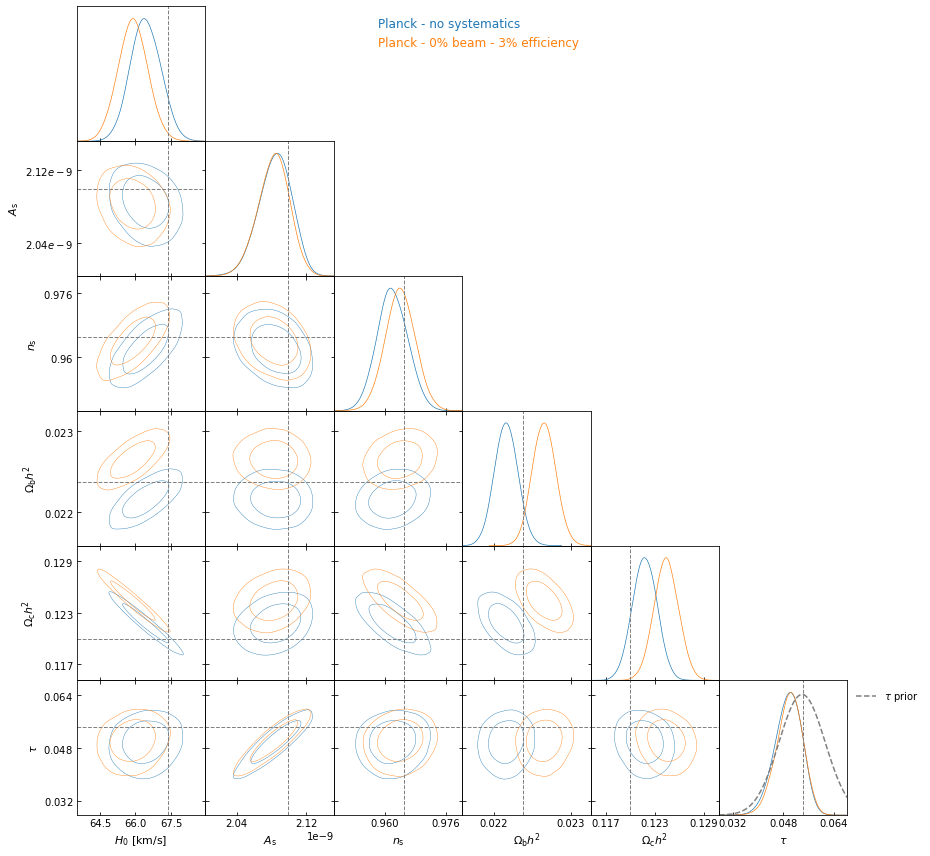

In [1]:
g = plots.getSubplotPlotter()
g.settings.lineM = ["-C{}".format(i) for i in range(10)]
g.triangle_plot(samples, labels[:-1], legend_labels=[])
# Add special legend
ax = g.subplots[0, 0]
from matplotlib.lines import Line2D
leg = ax.legend(len(chains)*[Line2D([], [], lw=0)], chains.keys(),
                loc="upper left", bbox_to_anchor=(2,1), fontsize="large", ncol=1)
for i, t in enumerate(leg.texts):
  t.set_color(g.settings.lineM[i].strip("-"))

# Show prior on tau
ax = g.subplots[-1, -1]
xmin, xmax, ymin, ymax = ax.axis()
x = np.linspace(xmin, xmax, 100)
from scipy.stats import norm
ax.plot(x, 0.018*norm.pdf(x, 0.054, 0.0073), color='gray', ls='--', label=r"$\tau$ prior")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

ref = [67.36, np.exp(3.044)/1e10, 0.9649, 0.02237, 0.1200, 0.0544]
show_ref(g, ref)

#### Compare \chi^2



# Out[13]:

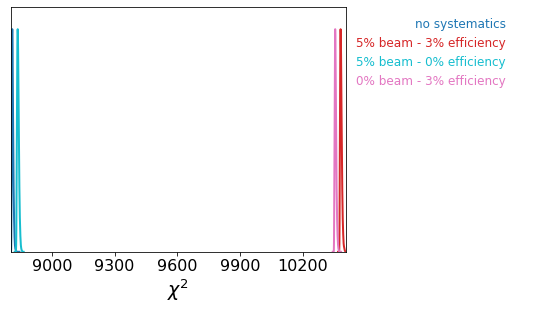

In [1]:
g = plots.getSinglePlotter()
g.settings.lineM = ["-C0", "-C3", "-C9", "-C6"]
g.plot_1d(samples, "$\chi^2$")
ax = g.fig.axes[-1]
leg = ax.legend(len(chains)*[Line2D([], [], lw=0)], chains.keys(),
                loc="upper left", bbox_to_anchor=(1,1), fontsize="large", ncol=1, markerfirst=False)
for i, t in enumerate(leg.texts):
  t.set_color(g.settings.lineM[i].strip("-"))

### Putting all together



Getting all samples



In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$",
          r"$\tau$"]

output_path = "/home/garrido/Workdir/CMB/analysis/corrcoeff/output/"
chains = {
    "SO - no systematics": output_path + "mcmc_corrcoeff_unbinned_noise/results_joint_TT_TE_EE_666_[0-4]",
    "SO - 0% beam - 3% efficiency": output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_0percent_pol_efficiency_3percent/results_joint_TT_TE_EE_666_[0-4]",
    "SO - 5% beam - 0% efficiency": output_path + "mcmc_corrcoeff_unbinned_noise_syst_beam_5percent_pol_efficiency_0percent/results_joint_TT_TE_EE_666_[0-4]",
    "Planck - no systematics": output_path + "mcmc_corrcoeff_unbinned_planck_noise/results_joint_TT_TE_EE_44_[0-4]",
    "Planck - 0% beam - 3% efficiency": output_path + "mcmc_corrcoeff_unbinned_planck_noise_syst_beam_0percent_pol_efficiency_3percent/results_joint_TT_TE_EE_44_[0-4]"
}

cols = [7, 6, 2, 3, 4, 5]
samples = [get_mcmc_samples(path, cols=cols, labels=labels) for path in chains.values()]

# Out[91]:

# Out[100]:

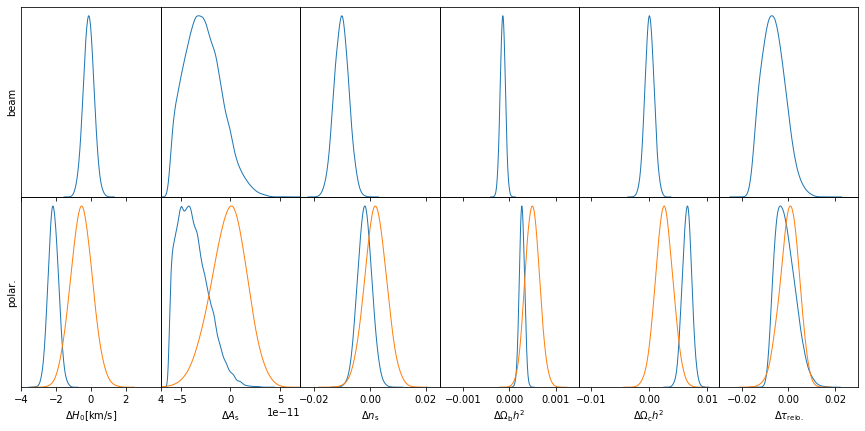

In [1]:
labels = [r"$\Delta{}H_0 [\mathrm{km/s}]$",
          r"$\Delta{}A_\mathrm{s}$",
          r"$\Delta{}n_\mathrm{s}$",
          r"$\Delta\Omega_\mathrm{b}h^2$",
          r"$\Delta\Omega_\mathrm{c}h^2$",
          r"$\Delta\tau_\mathrm{reio.}$"]
nx = len(labels)
ny = 2

fig, ax = plt.subplots(ny, nx, sharey=True, sharex="col", figsize=(15, 7))
plt.subplots_adjust(hspace=0, wspace=0)
plt.yticks([])
plt.ylim(0, 1.05)
for i in range(nx):
  ax[-1, i].set_xlabel(labels[i])
for i, ylabel in enumerate(["beam", "polar."]):
  ax[i, 0].set_ylabel(ylabel)

colors = ["-C{}".format(i) for i in range(10)]
# labels = ["$\mathcal{R}_\ell^{\mathmr{TE}}$", "Simons Observatory (TT, TE, EE)", "Planck (TT, TE, EE)"]
legends = ["Simons Observatory (TT, TE, EE)", "Planck (TT, TE, EE)"]

# samples = [samples[1].samples - samples[0].getMeans(),
#            samples[4].samples - samples[3].getMeans(),
#            samples[2].samples - samples[0].getMeans()
# ]
def _plot_sample(sample, ax, idx):
  g = plots.getSubplotPlotter()
  g.plots_1d(MCSamples(samples=sample, names=labels), nx=len(labels))
  for j in range(nx):
    line = g.subplots[0, j].get_lines()[0]
    ax[j].plot(line.get_xdata(), line.get_ydata(), colors[idx], lw=1, label=legends[idx])

_plot_sample(samples[1].samples - samples[0].getMeans(), ax[1], 0)
_plot_sample(samples[4].samples - samples[3].getMeans(), ax[1], 1)
_plot_sample(samples[2].samples - samples[0].getMeans(), ax[0], 0)
# _plot_sample(samples[4].samples - samples[3].getMeans(), ax[1], 1)

lims = [[-4, +4], [-7e-11, +7e-11], [-0.025, +0.025], [-0.0015, +0.0015], [-0.012, +0.012], [-0.03, 0.03]]
for i, a in enumerate(ax[-1, :]):
  a.set_xlim(lims[i])

# leg = ax[0, -1].legend(loc="upper left", bbox_to_anchor=(1,1))
# for i, item in enumerate(leg.legendHandles):
#   item.set_color(colors[i])
# # item.set_visible(False)
# #   colors += [item.get_color()]
for i, text in enumerate(leg.get_texts()):
  text.set_color(colors[i])

# ax = ax[0, -1]
# xmin, xmax, ymin, ymax = ax.axis()
# x = np.linspace(xmin, xmax, 100)
# from scipy.stats import norm
# ax.plot(x, 0.018*norm.pdf(x, 0.0, 0.0073), color='gray', ls='--', label=r"$\tau$ prior")

## Residuals



### Get best parameters set



In [1]:
import numpy as np
best_fit = {"beam_1percent_pol_effiency_1percent":
            {"R":  {"chi2": 2931.5320, "pars": np.array([6.7017021e+01, 2.0959351e-09, 9.6998332e-01, 2.2282357e-02, 1.2078999e-01, 5.7581715e-02])},
             "TE": {"chi2": 2931.1698, "pars": np.array([6.6987764e+01, 2.1027586e-09, 9.6422954e-01, 2.2345588e-02, 1.2101197e-01, 5.9682099e-02])}},
            "beam_2percent_pol_effiency_2percent":
            {"R":  {"chi2": 2931.5555, "pars": np.array([6.6852759e+01, 2.0841055e-09, 9.6931002e-01, 2.2284859e-02,1.2127333e-01, 6.0853222e-02])},
             "TE": {"chi2": 2931.1504, "pars": np.array([6.6958877e+01, 2.0769685e-09, 9.6142612e-01, 2.2277736e-02,1.2099358e-01, 5.9149769e-02])}},
            "beam_5percent_pol_effiency_3percent":
            {"R":  {"chi2": 2931.5888, "pars": np.array([6.6950859e+01, 2.0940361e-09, 9.6741873e-01, 2.2275347e-02,1.2098295e-01, 5.8618206e-02])},
             "TE": {"chi2": 2932.4420, "pars": np.array([6.6689252e+01, 2.0306725e-09, 9.5449374e-01, 2.2191995e-02,1.2149131e-01, 5.4631719e-02])}}}

# Out[51]:

### Run camb via cobaya



In [1]:
import yaml
with open("../yaml/corrcoeff.yaml", "r") as stream:
    setup = yaml.load(stream)

# Get experiment setup
experiment = setup["experiment"]
lmin, lmax = experiment["lmin"], experiment["lmax"]
fsky = experiment["fsky"]

from corrcoeff import utils
Cls = utils.get_theory_cls(setup, lmax)
ls = np.arange(lmin, lmax)
Cl_tt = Cls["tt"][lmin:lmax]
Cl_te = Cls["te"][lmin:lmax]
Cl_ee = Cls["ee"][lmin:lmax]

### Get residuals



# Out[99]:

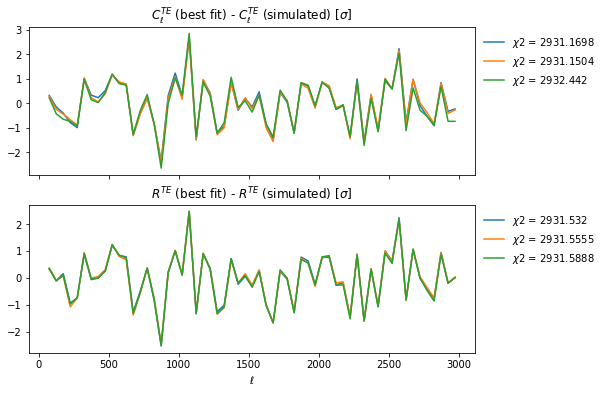

In [1]:
bin_size = 50
def bin_array(a):
  return a.reshape(-1, bin_size).mean(axis=1)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 1, sharex="col", figsize=(8,6))
for i, (k1, v1) in enumerate(best_fit.items()):
  for k2, v2 in v1.items():
    from copy import deepcopy
    setup_mod = deepcopy(setup)
    cosmo_params = setup_mod["simulation"]["cosmo. parameters"]
    del cosmo_params["cosmomc_theta"]
    cosmo_params["H0"] = v2["pars"][0]
    cosmo_params["As"] = v2["pars"][1]
    cosmo_params["ns"] = v2["pars"][2]
    cosmo_params["ombh2"] = v2["pars"][3]
    cosmo_params["omch2"] = v2["pars"][4]
    cosmo_params["tau"] = v2["pars"][5]

    from corrcoeff import utils
    Cls_mod = utils.get_theory_cls(setup_mod, lmax)
    Cl_tt_mod = Cls_mod["tt"][lmin:lmax]
    Cl_te_mod = Cls_mod["te"][lmin:lmax]
    Cl_ee_mod = Cls_mod["ee"][lmin:lmax]

    # Add systematics
    syst = np.loadtxt("../systematics/syst_{}.dat".format(k1))
    syst = syst[:,-1][lmin:lmax]
    Cl_te_syst = Cl_te*syst
    Cl_tt_syst = Cl_tt*syst
    Cl_ee_syst = Cl_ee*syst

    ls_binned = bin_array(ls)

    np.random.seed(666)
    if k2 == "R":
      R_syst = Cl_te_syst/np.sqrt(Cl_tt_syst*Cl_ee_syst)
      R_mod = Cl_te_mod/np.sqrt(Cl_tt_mod*Cl_ee_mod)
      covmat = 1/(2*ls+1)/fsky*(R_syst**4 - 2*R_syst**2 + 1)
      R_sim = R_syst + np.sqrt(covmat)*np.random.randn(len(ls))

      R_sim_bin = bin_array(R_sim)
      R_mod_bin = bin_array(R_mod)
      inv_covmat_bin = (1/covmat).reshape(-1, bin_size).sum(axis=1)

      # ax[1].errorbar(ls_binned, ls_binned**2*(R_mod_bin-R_sim_bin),
      #                fmt=".C{}".format(i), yerr=ls_binned**2*np.sqrt(1/inv_covmat_bin), label="{} {} $\chi^2$ = {}".format(k1, k2, v2["chi2"]))
      ax[1].plot(ls_binned, (R_mod_bin-R_sim_bin)/np.sqrt(1/inv_covmat_bin), label="$\chi2$ = {}".format(v2["chi2"]))

    elif k2 == "TE":
      covmat = 1/(2*ls+1)/fsky*(Cl_tt_syst*Cl_ee_syst+Cl_te_syst**2)
      Cl_te_sim = Cl_te_syst + np.sqrt(covmat)*np.random.randn(len(ls))

      Cl_te_mod_bin = bin_array(Cl_te_mod)
      Cl_te_sim_bin = bin_array(Cl_te_sim)
      inv_covmat_bin = (1/covmat).reshape(-1, bin_size).sum(axis=1)

      # ax[0].errorbar(ls_binned, ls_binned**2*(Cl_te_mod_bin-Cl_te_sim_bin),
      #                fmt=".C{}".format(i), yerr=ls_binned**2*np.sqrt(1/inv_covmat_bin), label="{} {} $\chi^2$ = {}".format(k1, k2, v2["chi2"]))
      ax[0].plot(ls_binned, (Cl_te_mod_bin-Cl_te_sim_bin)/np.sqrt(1/inv_covmat_bin), label="$\chi2$ = {}".format(v2["chi2"]))

ax[1].set_xlabel("$\ell$")
# ax[0].set_title("$\ell^2[C_\ell^{TE}$ (best fit) - $C_\ell^{TE}$ (simulated)]")
# ax[1].set_title("$\ell^2[R^{TE}$ (best fit) - $R^{TE}$ (simulated)]")
ax[0].set_title("$C_\ell^{TE}$ (best fit) - $C_\ell^{TE}$ (simulated) [$\sigma$]")
ax[1].set_title("$R^{TE}$ (best fit) - $R^{TE}$ (simulated) [$\sigma$]")
ax[0].legend(loc="upper left", bbox_to_anchor=(1,1))
ax[1].legend(loc="upper left", bbox_to_anchor=(1,1))

### Show spectra given R best fit results



# Out[125]:

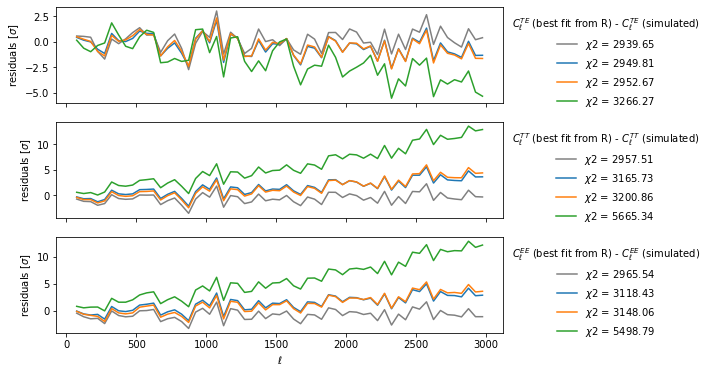

In [1]:
fig, ax = plt.subplots(3, 1, sharex="col", figsize=(8,6))
for i, (k1, v1) in enumerate(best_fit.items()):
  for k2, v2 in v1.items():
    if k2 == "TE": continue
    from copy import deepcopy
    setup_mod = deepcopy(setup)
    cosmo_params = setup_mod["simulation"]["cosmo. parameters"]
    del cosmo_params["cosmomc_theta"]
    cosmo_params["H0"] = v2["pars"][0]
    cosmo_params["As"] = v2["pars"][1]
    cosmo_params["ns"] = v2["pars"][2]
    cosmo_params["ombh2"] = v2["pars"][3]
    cosmo_params["omch2"] = v2["pars"][4]
    cosmo_params["tau"] = v2["pars"][5]

    from corrcoeff import utils
    Cls_mod = utils.get_theory_cls(setup_mod, lmax)
    Cl_tt_mod = Cls_mod["tt"][lmin:lmax]
    Cl_te_mod = Cls_mod["te"][lmin:lmax]
    Cl_ee_mod = Cls_mod["ee"][lmin:lmax]

    ls_binned = bin_array(ls)
    Cl_tt_mod_bin = bin_array(Cl_tt_mod)
    Cl_te_mod_bin = bin_array(Cl_te_mod)
    Cl_ee_mod_bin = bin_array(Cl_ee_mod)

    # Add systematics
    syst = np.loadtxt("../systematics/syst_{}.dat".format(k1))
    syst = syst[:,-1][lmin:lmax]
    Cl_te_syst = Cl_te*syst
    Cl_tt_syst = Cl_tt*syst
    Cl_ee_syst = Cl_ee*syst

    #
    def compute_residuals(mode, with_syst=True):
      np.random.seed(666)
      _cl_tt = Cl_tt_syst if with_syst else Cl_tt
      _cl_te = Cl_te_syst if with_syst else Cl_te
      _cl_ee = Cl_ee_syst if with_syst else Cl_ee

      if mode == "TE":
        _covmat = 1/(2*ls+1)/fsky*(_cl_tt*_cl_ee+_cl_te**2)
        _cl = _cl_te
      elif mode == "TT":
        _covmat = 1/(2*ls+1)/fsky*2*(_cl_tt**2)
        _cl = _cl_tt
      elif mode == "EE":
        _covmat = 1/(2*ls+1)/fsky*2*(_cl_ee**2)
        _cl = _cl_ee
      _cl_sim = _cl + np.sqrt(_covmat)*np.random.randn(len(ls))
      _cl_fit = Cls_mod[mode.lower()][lmin:lmax]
      _chi2 = np.sum((_cl_fit-_cl_sim)**2/_covmat)
      _inv_covmat_bin = (1/_covmat).reshape(-1, bin_size).sum(axis=1)
      y = (bin_array(_cl_fit) - bin_array(_cl_sim))*np.sqrt(_inv_covmat_bin)
      return y, _chi2

    for j, m in enumerate(["TE", "TT", "EE"]):
      if i == 0:
        y, chi2 = compute_residuals(m, with_syst=False)
        ax[j].plot(ls_binned, y, label="$\chi2$ = {:.2f}".format(chi2), color="gray")

      y, chi2 = compute_residuals(m)
      ax[j].plot(ls_binned, y, label="$\chi2$ = {:.2f}".format(chi2), color="C{}".format(i))

ax[2].set_xlabel("$\ell$")
for i in range(3):
  ax[i].set_ylabel("residuals [$\sigma$]")
ax[0].legend(title="$C_\ell^{TE}$ (best fit from R) - $C_\ell^{TE}$ (simulated)", loc="upper left", bbox_to_anchor=(1,1))
ax[1].legend(title="$C_\ell^{TT}$ (best fit from R) - $C_\ell^{TT}$ (simulated)", loc="upper left", bbox_to_anchor=(1,1))
ax[2].legend(title="$C_\ell^{EE}$ (best fit from R) - $C_\ell^{EE}$ (simulated)", loc="upper left", bbox_to_anchor=(1,1))